# Function approximation by finite elements
<div id="ch:approx:fe"></div>

The purpose of this chapter is to use the ideas from the previous
chapter on how to approximate functions, but the basis functions are now
of finite element type.

# Finite element basis functions
<div id="fem:approx:fe"></div>

The specific basis functions exemplified in previous chapter are in general nonzero on the entire domain
$\Omega$, as can be seen in [Figure](#fem:approx:fe:fig:u:sin), where
we plot two sinusoidal basis functions $\psi_0(x)=\sin\frac{1}{2}\pi x$ and
$\psi_1(x)=\sin 2\pi x$ together with the sum $u(x)=4\psi_0(x) -
\frac{1}{2}\psi_1(x)$. We shall now turn our attention to basis functions
that have *compact support*, meaning that they are nonzero on a small
portion of $\Omega$ only. Moreover, we shall restrict the functions to
be *piecewise polynomials*. This means that the domain is split into
subdomains and each basis function is a polynomial on one or more of
these subdomains, see [Figure](#fem:approx:fe:fig:u:fe) for a sketch
involving locally defined hat functions that make
$u=\sum_jc_j{\psi}_j$ piecewise linear. At the boundaries between
subdomains, one normally just forces continuity of $u$, so that when
connecting two polynomials from two subdomains, the derivative becomes
discontinuous. This type of basis functions is fundamental in the
finite element method.  (One may wonder why continuity of derivatives
is not desired, and it is, but it turns out to be mathematically
challenging in 2D and 3D, and it is not strictly needed.)

<!-- dom:FIGURE: [fig/u_example_sin.png, width=600] A function resulting from a weighted sum of two sine basis functions. <div id="fem:approx:fe:fig:u:sin"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:u:sin"></div>

<p>A function resulting from a weighted sum of two sine basis functions.</p>
<img src="fig/u_example_sin.png" width=600>

<!-- end figure -->


<!-- dom:FIGURE: [fig/u_example_P1.png, width=600] A function resulting from a weighted sum of three local piecewise linear (hat) functions. <div id="fem:approx:fe:fig:u:fe"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:u:fe"></div>

<p>A function resulting from a weighted sum of three local piecewise linear (hat) functions.</p>
<img src="fig/u_example_P1.png" width=600>

<!-- end figure -->


We first introduce the concepts of elements and nodes in a simplistic fashion.
Later, we shall generalize the concept
of an element, which is a necessary step before treating a wider class of
approximations within the family of finite element methods.
The generalization is also compatible with
the concepts used in the [FEniCS](http://fenicsproject.org) finite
element software.

## Elements and nodes
<div id="fem:approx:fe:def:elements:nodes"></div>

Let $u$ and $f$ be defined on an interval $\Omega$. We divide $\Omega$
into $N_e$ non-overlapping subintervals $\Omega^{(e)}$,
$e=0,\ldots,N_e-1$:

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation}
\Omega = \Omega^{(0)}\cup \cdots \cup \Omega^{(N_e)}{\thinspace .}   \label{_auto32} \tag{68}
\end{equation}
$$

We shall for now refer to $\Omega^{(e)}$ as an *element*, identified
by the unique number $e$.  On each element we introduce a set of
points called *nodes*.  For now we assume that the nodes are uniformly
spaced throughout the element and that the boundary points of the
elements are also nodes.  The nodes are given numbers both within an
element and in the global domain. These are referred to as *local* and
*global* node numbers, respectively.  Local nodes are numbered with an
index $r=0,\ldots,d$, while the $N_n$ global nodes are numbered as
$i=0,\ldots,N_n-1$.  [Figure](#fem:approx:fe:def:elements:nodes:fig:P1) shows nodes as small
circular disks and element boundaries as small vertical lines.  Global
node numbers appear under the nodes, but local node numbers are not
shown. Since there are two nodes in each element, the local nodes are
numbered 0 (left) and 1 (right) in each element.

<!-- dom:FIGURE: [fig/fe_mesh1D_P1.png, width=500 frac=0.7] Finite element mesh with 5 elements and 6 nodes. <div id="fem:approx:fe:def:elements:nodes:fig:P1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:def:elements:nodes:fig:P1"></div>

<p>Finite element mesh with 5 elements and 6 nodes.</p>
<img src="fig/fe_mesh1D_P1.png" width=500>

<!-- end figure -->



Nodes and elements uniquely define a *finite element mesh*, which is
our discrete representation of the domain in the computations.  A
common special case is that of a *uniformly partitioned mesh* where
each element has the same length and the distance between nodes is
constant.  [Figure](#fem:approx:fe:def:elements:nodes:fig:P1) shows
an example on a uniformly partitioned mesh. The strength of the finite
element method (in contrast to the finite difference method) is that
it is just as easy to work with a non-uniformly partitioned mesh in 3D as a
uniformly partitioned mesh in 1D.

### Example

On $\Omega =[0,1]$ we may introduce two elements,
$\Omega^{(0)}=[0,0.4]$ and $\Omega^{(1)}=[0.4,1]$. Furthermore, let us
introduce three nodes per element, equally spaced within each element.
[Figure](#fem:approx:fe:def:elements:nodes:fig:P2) shows the mesh
with $N_e=2$ elements and $N_n=2N_e+1=5$ nodes.  A node's coordinate
is denoted by $x_i$, where $i$ is either a global node number or a
local one. In the latter case we also need to know the element number
to uniquely define the node.

The three nodes in element number 0 are $x_0=0$, $x_1=0.2$, and
$x_2=0.4$.  The local and global node numbers are here equal.  In
element number 1, we have the local nodes $x_0=0.4$, $x_1=0.7$, and
$x_2=1$ and the corresponding global nodes $x_2=0.4$, $x_3=0.7$, and
$x_4=1$. Note that the global node $x_2=0.4$ is shared by the two
elements.

<!-- dom:FIGURE: [fig/fe_mesh1D_P2.png, width=500 frac=0.7] Finite element mesh with 2 elements and 5 nodes. <div id="fem:approx:fe:def:elements:nodes:fig:P2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:def:elements:nodes:fig:P2"></div>

<p>Finite element mesh with 2 elements and 5 nodes.</p>
<img src="fig/fe_mesh1D_P2.png" width=500>

<!-- end figure -->


For the purpose of implementation, we introduce two lists or arrays:
`nodes` for storing the coordinates of the nodes, with the global node
numbers as indices, and `elements` for holding the global node numbers
in each element. By defining `elements` as a list of lists, where each
sublist contains the global node numbers of one particular element,
the indices of each sublist will correspond to local node numbers for
that element.  The `nodes` and `elements` lists for the sample mesh
above take the form

In [1]:
nodes = [0, 0.2, 0.4, 0.7, 1]
elements = [[0, 1, 2], [2, 3, 4]]

Looking up the coordinate of, e.g., local node number 2 in element 1,
is done by `nodes[elements[1][2]]` (recall that nodes and
elements start their numbering at 0). The corresponding global node number
is 4, so we could alternatively look up the coordinate as `nodes[4]`.

The numbering of elements and nodes does not need to be regular.
[Figure](#fem:approx:fe:def:elements:nodes:fig:P1:irregular) shows
an example corresponding to

In [2]:
nodes = [1.5, 5.5, 4.2, 0.3, 2.2, 3.1]
elements = [[2, 1], [4, 5], [0, 4], [3, 0], [5, 2]]

<!-- dom:FIGURE: [fig/fe_mesh1D_random_numbering.png, width=500 frac=0.7] Example on irregular numbering of elements and nodes. <div id="fem:approx:fe:def:elements:nodes:fig:P1:irregular"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:def:elements:nodes:fig:P1:irregular"></div>

<p>Example on irregular numbering of elements and nodes.</p>
<img src="fig/fe_mesh1D_random_numbering.png" width=500>

<!-- end figure -->


## The basis functions

### Construction principles

Finite element basis functions are in this text recognized by
the notation ${\varphi}_i(x)$, where the index (now in the beginning)
corresponds to
a global node number. Since ${\psi}_i$ is the symbol for basis
functions in general in this text, the particular choice of
finite element basis functions means that we take
${\psi}_i = {\varphi}_i$.



Let $i$ be the global node number corresponding to local node $r$ in
element number $e$ with $d+1$ local nodes. We distinguish between
*internal* nodes in an element and *shared* nodes. The latter are
nodes that are shared with the neighboring elements.
The finite element basis functions ${\varphi}_i$
are now defined as follows.

  * For an internal node, with global number $i$ and local number $r$,
    take ${\varphi}_i(x)$ to be the Lagrange
    polynomial that is 1 at the local node $r$ and zero
    at all other nodes in the element.
    The degree of the polynomial is $d$.
    On all other elements, ${\varphi}_i=0$.

  * For a shared node,
    let ${\varphi}_i$ be made up of the Lagrange polynomial on this element
    that is 1 at node $i$, combined with the Lagrange polynomial over
    the neighboring element that is also 1 at node $i$.
    On all other elements, ${\varphi}_i=0$.

A visual impression of three such basis functions is given in
[Figure](#fem:approx:fe:fig:P2). When solving differential equations,
we need the derivatives of these basis functions as well, and the
corresponding derivatives are shown in [Figure](#fem:approx:fe:fig:dP2).
Note that the derivatives are highly discontinuous!
In these figures,
the domain $\Omega = [0,1]$ is divided into four equal-sized elements,
each having three local nodes.
The element boundaries are
marked by vertical dashed lines and the nodes by small circles.
The function ${\varphi}_2(x)$
is composed of a quadratic Lagrange polynomial over element 0 and 1,
${\varphi}_3(x)$ corresponds to an internal node in element 1 and
is therefore nonzero on this element only, while ${\varphi}_4(x)$
is like ${\varphi}_2(x)$ composed to two Lagrange polynomials over two
elements. Also observe that the basis function ${\varphi}_i$ is zero at
all nodes, except at global node number $i$.
We also remark that
the shape of a basis function over an element is completely determined
by the coordinates of the local nodes in the element.

<!-- Sometimes we refer to a Lagrange polynomial on an element $e$, which -->
<!-- means the basis function ${\varphi}_i(x)$ when $x\in\Omega^{(e)}$, and -->
<!-- ${\varphi}_i(x)=0$ when $x\notin\Omega^{(e)}$. -->


<!-- dom:FIGURE: [fig/phi/mpl_fe_basis_p2_4e_lab.png, width=600 frac=1]  Illustration of the piecewise quadratic basis functions associated with nodes in an element.  <div id="fem:approx:fe:fig:P2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:P2"></div>

<p>Illustration of the piecewise quadratic basis functions associated with nodes in an element.</p>
<img src="fig/phi/mpl_fe_basis_p2_4e_lab.png" width=600>

<!-- end figure -->


<!-- dom:FIGURE: [fig/phi/mpl_fe_dbasis_p2_4e_lab.png, width=600 frac=1]  Illustration of the derivatives of the piecewise quadratic basis functions associated with nodes in an element.  <div id="fem:approx:fe:fig:dP2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:dP2"></div>

<p>Illustration of the derivatives of the piecewise quadratic basis functions associated with nodes in an element.</p>
<img src="fig/phi/mpl_fe_dbasis_p2_4e_lab.png" width=600>

<!-- end figure -->


### Properties of ${\varphi}_i$

The construction of basis functions according to the principles above
lead to two important properties of ${\varphi}_i(x)$. First,

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:phi:prop1"></div>

$$
\begin{equation}
{\varphi}_i(x_{j}) =\delta_{ij},\quad \delta_{ij} =
\left\lbrace\begin{array}{ll}
1, & i=j,\\
0, & i\neq j,
\end{array}\right.
\label{fem:approx:fe:phi:prop1} \tag{69}
\end{equation}
$$

when $x_{j}$ is a node in the mesh with global node number $j$.
The
result ${\varphi}_i(x_{j}) =\delta_{ij}$ is obtained as
the Lagrange polynomials are constructed to have
exactly this property.
The property also implies a convenient interpretation of $c_i$
as the value of $u$ at node $i$. To show this, we expand $u$
in the usual way as $\sum_jc_j{\psi}_j$ and choose ${\psi}_i = {\varphi}_i$:

$$
u(x_{i}) = \sum_{j\in{\mathcal{I}_s}} c_j {\psi}_j (x_{i}) =
\sum_{j\in{\mathcal{I}_s}} c_j {\varphi}_j (x_{i}) = c_i {\varphi}_i (x_{i}) = c_i
{\thinspace .}
$$

Because of this interpretation,
the coefficient $c_i$ is by many named $u_i$ or $U_i$.

<!-- 2DO: switch to U_j? -->

Second,
${\varphi}_i(x)$ is mostly zero throughout the domain:

 * ${\varphi}_i(x) \neq 0$ only on those elements that contain global node $i$,

 * ${\varphi}_i(x){\varphi}_j(x) \neq 0$ if and only if $i$ and $j$ are global node
   numbers in the same element.

Since $A_{i,j}$ is the integral of
${\varphi}_i{\varphi}_j$ it means that
*most of the elements in the coefficient matrix will be zero*.
We will come back to these properties and use
them actively in computations to save memory and CPU time.

In our example so far, each element has $d+1$ nodes, resulting in
local Lagrange polynomials of degree $d$, but it is not a requirement to have
the same $d$ value in each element.

## Example on quadratic finite element functions

Let us set up the `nodes` and `elements` lists corresponding to the
mesh implied by [Figure](#fem:approx:fe:fig:P2).
[Figure](#fem:approx:fe:fig:P2:mesh) sketches the mesh and the
numbering. We have

In [3]:
nodes = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
elements = [[0, 1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 8]]

<!-- dom:FIGURE: [fig/fe_mesh1D_P2_4e.png, width=500 frac=0.7]  Sketch of mesh with 4 elements and 3 nodes per element.  <div id="fem:approx:fe:fig:P2:mesh"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:P2:mesh"></div>

<p>Sketch of mesh with 4 elements and 3 nodes per element.</p>
<img src="fig/fe_mesh1D_P2_4e.png" width=500>

<!-- end figure -->



Let us explain mathematically how the basis functions are constructed
according to the principles.
Consider element number 1 in [Figure](#fem:approx:fe:fig:P2:mesh),
$\Omega^{(1)}=[0.25, 0.5]$, with local nodes
0, 1, and 2 corresponding to global nodes 2, 3, and 4.
The coordinates of these nodes are
$0.25$, $0.375$, and $0.5$, respectively.
We define three Lagrange
polynomials on this element:

1. The polynomial that is 1 at local node 1
   (global node 3) makes up the basis function
   ${\varphi}_3(x)$ over this element,
   with ${\varphi}_3(x)=0$ outside the element.

2. The polynomial that is 1 at local node 0 (global node 2) is the "right
   part" of the global basis function
   ${\varphi}_2(x)$. The "left part" of ${\varphi}_2(x)$ consists of
   a Lagrange polynomial associated with local node 2 in
   the neighboring element $\Omega^{(0)}=[0, 0.25]$.

3. Finally, the polynomial that is 1 at local node 2 (global node 4)
   is the "left part" of the global basis function ${\varphi}_4(x)$.
   The "right part" comes from the Lagrange polynomial that is 1 at
   local node 0 in the neighboring element $\Omega^{(2)}=[0.5, 0.75]$.

The specific mathematical form of the polynomials *over element* 1 is
given by the formula ([56](#fem:approx:global:Lagrange:poly)):

$$
\begin{align*}
{\varphi}_3(x) &= \frac{(x-0.25)(x-0.5)}{(0.375-0.25)(0.375-0.5)},\quad x\in\Omega^{(1)}\\
{\varphi}_2(x) &= \frac{(x-0.375)(x-0.5)}{(0.25-0.375)(0.25-0.5)},\quad x\in\Omega^{(1)}\\
{\varphi}_4(x) &= \frac{(x-0.25)(x-0.375)}{(0.5-0.25)(0.5-0.25)},\quad x\in\Omega^{(1)} .
\end{align*}
$$

As mentioned earlier, any global basis function ${\varphi}_i(x)$ is zero
on elements that do not contain the node with global node number $i$.
Clearly, the property ([69](#fem:approx:fe:phi:prop1)) is easily
verified, see for instance that ${\varphi}_3(0.375) = 1$ while
${\varphi}_3(0.25) = 0$ and ${\varphi}_3(0.5) = 0$.

The other global functions associated with internal nodes,
${\varphi}_1$, ${\varphi}_5$, and ${\varphi}_7$, are all of the same shape
as the drawn ${\varphi}_3$ in [Figure](#fem:approx:fe:fig:P2), while
the global basis functions associated with shared nodes have the same
shape as shown ${\varphi}_2$ and ${\varphi}_4$. If the elements were of
different length, the basis functions would be stretched according to
the element size and hence be different.

<!-- This was difficult to follow: -->
<!-- The basis function ${\varphi}_2(x)$, corresponding to a node on the -->
<!-- boundary of element 0 and 1, is made up of two pieces: (i) the Lagrange -->
<!-- polynomial on element 1 that is 1 at local node 0 (global node 2) -->
<!-- and zero at all other nodes in element 1, and (ii) -->
<!-- the Lagrange -->
<!-- polynomial on element 1 that is 1 at local node 2 (global node 2) -->
<!-- and zero at all other nodes in element 0. Outside the elements that -->
<!-- share global node 2, ${\varphi}_2(x)=0$. The same reasoning is applied to -->
<!-- the construction of ${\varphi}_4(x)$ and ${\varphi}_6(x)$. -->


## Example on linear finite element functions


[Figure](#fem:approx:fe:fig:P1) shows
piecewise linear basis functions ($d=1$) (with derivatives in
[Figure](#fem:approx:fe:fig:dP1)). These are mathematically
simpler than the quadratic functions in the previous section, and one would
therefore think that it is easier to understand the linear functions
first. However, linear basis functions do not involve internal nodes
and are therefore a special case of the general situation. That is why
we think it is better to understand the construction of quadratic functions
first, which easily generalize to any $d > 2$, and then look at the
special case $d=1$.

<!-- dom:FIGURE: [fig/phi/mpl_fe_basis_p1_4e_lab.png, width=600 frac=1]  Illustration of the piecewise linear basis functions associated with nodes in an element.  <div id="fem:approx:fe:fig:P1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:P1"></div>

<p>Illustration of the piecewise linear basis functions associated with nodes in an element.</p>
<img src="fig/phi/mpl_fe_basis_p1_4e_lab.png" width=600>

<!-- end figure -->


<!-- dom:FIGURE: [fig/phi/mpl_fe_dbasis_p1_4e_lab.png, width=600 frac=1]  Illustration of the derivatives of piecewise linear basis functions associated with nodes in an element.  <div id="fem:approx:fe:fig:dP1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:dP1"></div>

<p>Illustration of the derivatives of piecewise linear basis functions associated with nodes in an element.</p>
<img src="fig/phi/mpl_fe_dbasis_p1_4e_lab.png" width=600>

<!-- end figure -->



We have the same four elements on $\Omega = [0,1]$.  Now there are no
internal nodes in the elements so that all basis functions are
associated with shared nodes and hence made up of two Lagrange
polynomials, one from each of the two neighboring elements.  For
example, ${\varphi}_1(x)$ results from the Lagrange polynomial in
element 0 that is 1 at local node 1 and 0 at local node 0, combined
with the Lagrange polynomial in element 1 that is 1 at local node 0
and 0 at local node 1.  The other basis functions are constructed
similarly.

Explicit mathematical formulas are needed for ${\varphi}_i(x)$ in
computations.  In the piecewise linear case, the formula
([56](#fem:approx:global:Lagrange:poly)) leads to

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:phi:1:formula1"></div>

$$
\begin{equation}
{\varphi}_i(x) = \left\lbrace\begin{array}{ll}
0, & x < x_{i-1},\\
(x - x_{i-1})/(x_{i} - x_{i-1}),
& x_{i-1} \leq x < x_{i},\\
1 -
(x - x_{i})/(x_{i+1} - x_{i}),
& x_{i} \leq x < x_{i+1},\\
0, & x\geq x_{i+1}{\thinspace .}  \end{array}
\right.
\label{fem:approx:fe:phi:1:formula1} \tag{70}
\end{equation}
$$

Here, $x_{j}$, $j=i-1,i,i+1$, denotes the coordinate of node $j$.
For elements of equal length $h$ the formulas can be simplified to

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:phi:1:formula2"></div>

$$
\begin{equation}
{\varphi}_i(x) = \left\lbrace\begin{array}{ll}
0, & x < x_{i-1},\\
(x - x_{i-1})/h,
& x_{i-1} \leq x < x_{i},\\
1 -
(x - x_{i})/h,
& x_{i} \leq x < x_{i+1},\\
0, & x\geq x_{i+1} .
\end{array}
\right.
\label{fem:approx:fe:phi:1:formula2} \tag{71}
\end{equation}
$$

## Example on cubic finite element functions

Piecewise cubic basis functions can be defined by introducing four
nodes per element. [Figure](#fem:approx:fe:fig:P3) shows
examples on ${\varphi}_i(x)$, $i=3,4,5,6$, associated with element number 1.
Note that ${\varphi}_4$ and ${\varphi}_5$ are nonzero only on element number 1,
while
${\varphi}_3$ and ${\varphi}_6$ are made up of Lagrange polynomials on two
neighboring elements.

<!-- dom:FIGURE: [fig/phi/mpl_fe_basis_p3_4e_lab.png, width=600 frac=1]  Illustration of the piecewise cubic basis functions associated with nodes in an element.  <div id="fem:approx:fe:fig:P3"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:P3"></div>

<p>Illustration of the piecewise cubic basis functions associated with nodes in an element.</p>
<img src="fig/phi/mpl_fe_basis_p3_4e_lab.png" width=600>

<!-- end figure -->



We see that all the piecewise linear basis functions have the same
"hat" shape. They are naturally referred to as *hat functions*,
also called *chapeau functions*.
The piecewise quadratic functions in [Figure](#fem:approx:fe:fig:P2)
are seen to be of two types. "Rounded hats" associated with internal
nodes in the elements and some more "sombrero" shaped hats associated
with element boundary nodes. Higher-order basis functions also have
hat-like shapes, but the functions have pronounced oscillations in addition,
as illustrated in [Figure](#fem:approx:fe:fig:P3).


A common terminology is to speak about *linear elements* as
elements with two local nodes associated with
piecewise linear basis functions. Similarly, *quadratic elements* and
*cubic elements* refer to piecewise quadratic or cubic functions
over elements with three or four local nodes, respectively.
Alternative names, frequently used in the following, are **P1** for linear
elements, **P2** for quadratic elements, and so forth: P$d$ signifies
degree $d$ of the polynomial basis functions.


## Calculating the linear system
<div id="fem:approx:global:linearsystem"></div>

The elements in the coefficient matrix and right-hand side are given
by the formulas ([28](#fem:approx:Aij)) and ([29](#fem:approx:bi)), but
now the choice of ${\psi}_i$ is ${\varphi}_i$.  Consider P1 elements
where ${\varphi}_i(x)$ is piecewise linear.  Nodes and elements numbered
consecutively from left to right in a uniformly partitioned mesh imply
the nodes

$$
x_i=i h,\quad i=0,\ldots,N_n-1,
$$

and the elements

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation}
\Omega^{(i)} = [x_{i},x_{i+1}] = [i h, (i+1)h],\quad
i=0,\ldots,N_e-1
{\thinspace .}
\label{_auto33} \tag{72}
\end{equation}
$$

We have in this case $N_e$ elements and $N_n=N_e+1$ nodes.
The parameter $N$ denotes the number of unknowns in the expansion
for $u$, and with the P1 elements, $N=N_n$.
The domain is $\Omega=[x_{0},x_{N}]$.
The formula for ${\varphi}_i(x)$ is given by
([71](#fem:approx:fe:phi:1:formula2)) and a graphical illustration is
provided in Figures [fem:approx:fe:fig:P1](#fem:approx:fe:fig:P1) and
[fem:approx:fe:fig:phi:i:im1](#fem:approx:fe:fig:phi:i:im1).


<!-- We clearly see -->
<!-- from the figures the very important property -->
<!-- ${\varphi}_i(x){\varphi}_j(x)\neq 0$ if and only if $j=i-1$, $j=i$, or -->
<!-- $j=i+1$, or alternatively expressed, if and only if $i$ and $j$ are -->
<!-- nodes in the same element. Otherwise, ${\varphi}_i$ and ${\varphi}_j$ are -->
<!-- too distant to have an overlap and consequently their product vanishes. -->

<!-- dom:FIGURE: [fig/fe_mesh1D_phi_2_3.png, width=500 frac=0.7]  Illustration of the piecewise linear basis functions corresponding to global node 2 and 3.  <div id="fem:approx:fe:fig:phi:2:3"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:phi:2:3"></div>

<p>Illustration of the piecewise linear basis functions corresponding to global node 2 and 3.</p>
<img src="fig/fe_mesh1D_phi_2_3.png" width=500>

<!-- end figure -->


### Calculating specific matrix entries

Let us calculate the specific matrix entry $A_{2,3} = \int_\Omega
{\varphi}_2{\varphi}_3{\, \mathrm{d}x}$. [Figure](#fem:approx:fe:fig:phi:2:3)
shows what ${\varphi}_2$ and ${\varphi}_3$ look like. We realize
from this figure that the product ${\varphi}_2{\varphi}_3\neq 0$
only over element 2, which contains node 2 and 3.
The particular formulas for ${\varphi}_{2}(x)$ and ${\varphi}_3(x)$ on
$[x_{2},x_{3}]$ are found from ([71](#fem:approx:fe:phi:1:formula2)).
The function
${\varphi}_3$ has positive slope over $[x_{2},x_{3}]$ and corresponds
to the interval $[x_{i-1},x_{i}]$ in
([71](#fem:approx:fe:phi:1:formula2)). With $i=3$ we get

$$
{\varphi}_3(x) = (x-x_2)/h,
$$

while ${\varphi}_2(x)$ has negative slope over $[x_{2},x_{3}]$
and corresponds to setting $i=2$ in ([71](#fem:approx:fe:phi:1:formula2)),

$$
{\varphi}_2(x) = 1- (x-x_2)/h{\thinspace .}
$$

We can now easily integrate,

$$
A_{2,3} = \int_\Omega {\varphi}_2{\varphi}_{3}{\, \mathrm{d}x} =
\int_{x_{2}}^{x_{3}}
\left(1 - \frac{x - x_{2}}{h}\right) \frac{x - x_{2}}{h}
 {\, \mathrm{d}x} = \frac{h}{6}{\thinspace .}
$$

The diagonal entry in the coefficient matrix becomes

$$
A_{2,2} =
\int_{x_{1}}^{x_{2}}
\left(\frac{x - x_{1}}{h}\right)^2{\, \mathrm{d}x} +
\int_{x_{2}}^{x_{3}}
\left(1 - \frac{x - x_{2}}{h}\right)^2{\, \mathrm{d}x}
= \frac{2h}{3}{\thinspace .}
$$

The entry $A_{2,1}$ has an
integral that is geometrically similar to the situation in
[Figure](#fem:approx:fe:fig:phi:2:3), so we get
$A_{2,1}=h/6$.


### Calculating a general row in the matrix

We can now generalize the calculation of matrix entries to
a general row number $i$. The entry
$A_{i,i-1}=\int_\Omega{\varphi}_i{\varphi}_{i-1}{\, \mathrm{d}x}$ involves
hat functions as depicted in
[Figure](#fem:approx:fe:fig:phi:i:im1). Since the integral
is geometrically identical to the situation with specific nodes
2 and 3, we realize that $A_{i,i-1}=A_{i,i+1}=h/6$ and
$A_{i,i}=2h/3$. However, we can compute the integral directly
too:

$$
\begin{align*}
A_{i,i-1} &= \int_\Omega {\varphi}_i{\varphi}_{i-1}{\, \mathrm{d}x}\\
&=
\underbrace{\int_{x_{i-2}}^{x_{i-1}} {\varphi}_i{\varphi}_{i-1}{\, \mathrm{d}x}}_{{\varphi}_i=0} +
\int_{x_{i-1}}^{x_{i}} {\varphi}_i{\varphi}_{i-1}{\, \mathrm{d}x} +
\underbrace{\int_{x_{i}}^{x_{i+1}} {\varphi}_i{\varphi}_{i-1}{\, \mathrm{d}x}}_{{\varphi}_{i-1}=0}\\
&= \int_{x_{i-1}}^{x_{i}}
\underbrace{\left(\frac{x - x_{i}}{h}\right)}_{{\varphi}_i(x)}
\underbrace{\left(1 - \frac{x - x_{i-1}}{h}\right)}_{{\varphi}_{i-1}(x)} {\, \mathrm{d}x} =
\frac{h}{6}
{\thinspace .}
\end{align*}
$$

The particular formulas for ${\varphi}_{i-1}(x)$ and ${\varphi}_i(x)$ on
$[x_{i-1},x_{i}]$ are found from ([71](#fem:approx:fe:phi:1:formula2)):
${\varphi}_i$ is the linear function with positive slope, corresponding
to the interval $[x_{i-1},x_{i}]$ in
([71](#fem:approx:fe:phi:1:formula2)), while $\phi_{i-1}$ has a
negative slope so the definition in interval
$[x_{i},x_{i+1}]$ in ([71](#fem:approx:fe:phi:1:formula2)) must be
used.

<!-- dom:FIGURE: [fig/fe_mesh1D_phi_i_im1.png, width=500 frac=0.7]  Illustration of two neighboring linear (hat) functions with general node numbers.  <div id="fem:approx:fe:fig:phi:i:im1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:phi:i:im1"></div>

<p>Illustration of two neighboring linear (hat) functions with general node numbers.</p>
<img src="fig/fe_mesh1D_phi_i_im1.png" width=500>

<!-- end figure -->



The first and last row of the coefficient matrix lead to slightly
different integrals:

$$
A_{0,0} = \int_\Omega {\varphi}_0^2{\, \mathrm{d}x} = \int_{x_{0}}^{x_{1}}
\left(1 - \frac{x-x_0}{h}\right)^2{\, \mathrm{d}x} = \frac{h}{3}{\thinspace .}
$$

Similarly, $A_{N,N}$ involves an integral over only one element
and hence equals $h/3$.

<!-- dom:FIGURE: [fig/fe_mesh1D_phi_i_f.png, width=500 frac=0.7]  Right-hand side integral with the product of a basis function and the given function to approximate.  <div id="fem:approx:fe:fig:phi:i:f"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:phi:i:f"></div>

<p>Right-hand side integral with the product of a basis function and the given function to approximate.</p>
<img src="fig/fe_mesh1D_phi_i_f.png" width=500>

<!-- end figure -->



The general formula for $b_i$,
see [Figure](#fem:approx:fe:fig:phi:i:f), is now easy to set up

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:bi:formula1"></div>

$$
\begin{equation}
b_i = \int_\Omega{\varphi}_i(x)f(x){\, \mathrm{d}x}
= \int_{x_{i-1}}^{x_{i}} \frac{x - x_{i-1}}{h} f(x){\, \mathrm{d}x}
+ \int_{x_{i}}^{x_{i+1}} \left(1 - \frac{x - x_{i}}{h}\right) f(x)
{\, \mathrm{d}x}{\thinspace .}
\label{fem:approx:fe:bi:formula1} \tag{73}
\end{equation}
$$

We remark that the above formula applies to internal nodes (living at the interface between two elements)
and that for the nodes on the boundaries only one integral needs to be computed.

We need a specific $f(x)$ function to compute these integrals.
With $f(x)=x(1-x)$ and
two equal-sized elements in $\Omega=[0,1]$, one gets

$$
A = \frac{h}{6}\left(\begin{array}{ccc}
2 & 1 & 0\\
1 & 4 & 1\\
0 & 1 & 2
\end{array}\right),\quad
b = \frac{h^2}{12}\left(\begin{array}{c}
2 - h\\
12 - 14h\\
10 -17h
\end{array}\right){\thinspace .}
$$

The solution becomes

$$
c_0 = \frac{h^2}{6},\quad c_1 = h - \frac{5}{6}h^2,\quad
c_2 = 2h - \frac{23}{6}h^2{\thinspace .}
$$

The resulting function

$$
u(x)=c_0{\varphi}_0(x) + c_1{\varphi}_1(x) + c_2{\varphi}_2(x)
$$

is displayed in [Figure](#fem:approx:fe:fig:ls:P1:2:4) (left).
Doubling the number of elements to four leads to the improved
approximation in the right part of [Figure](#fem:approx:fe:fig:ls:P1:2:4).

<!-- dom:FIGURE: [fig/fe_p1_x2_2e_4e.png, width=800 frac=1.0]  Least squares approximation of a parabola using 2 (left) and 4 (right) P1 elements. <div id="fem:approx:fe:fig:ls:P1:2:4"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:ls:P1:2:4"></div>

<p>Least squares approximation of a parabola using 2 (left) and 4 (right) P1 elements.</p>
<img src="fig/fe_p1_x2_2e_4e.png" width=800>

<!-- end figure -->




## Assembly of elementwise computations
<div id="fem:approx:fe:elementwise"></div>

Our integral computations so far have been straightforward. However,
with higher-degree polynomials and in higher dimensions (2D and 3D),
integrating in the physical domain gets increasingly complicated. Instead,
integrating over one element at a time, and transforming each element
to a common standardized geometry in a new reference coordinate system,
is technically easier. Almost all computer codes employ a finite element
algorithm that calculates the linear system by integrating over one
element at a time. We shall therefore explain this algorithm next.
The amount of details might be overwhelming during a first reading, but
once all those details are done right, one has a general
finite element algorithm that can be applied to all sorts of elements,
in any space dimension, no matter how geometrically complicated the domain
is.


### The element matrix

We start by splitting
the integral over $\Omega$ into a sum of contributions from
each element:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:elementwise:Asplit"></div>

$$
\begin{equation}
A_{i,j} = \int_\Omega{\varphi}_i{\varphi}_j {\, \mathrm{d}x} = \sum_{e} A^{(e)}_{i,j},\quad
A^{(e)}_{i,j}=\int_{\Omega^{(e)}} {\varphi}_i{\varphi}_j {\, \mathrm{d}x}
{\thinspace .}
\label{fem:approx:fe:elementwise:Asplit} \tag{74}
\end{equation}
$$

Now, $A^{(e)}_{i,j}\neq 0$, if and only if, $i$ and $j$ are nodes in element
$e$ (look at [Figure](#fem:approx:fe:fig:phi:i:im1) to realize this
property, but the result also holds for all types of elements).
Introduce $i=q(e,r)$ as the mapping of local node number $r$ in element
$e$ to the global node number $i$. This is just a short mathematical notation
for the expression `i=elements[e][r]` in a program.
Let $r$ and $s$ be the local node numbers corresponding to the global
node numbers $i=q(e,r)$ and
$j=q(e,s)$. With $d+1$ nodes per element, all the nonzero matrix entries
in $A^{(e)}_{i,j}$ arise from the integrals involving basis functions with
indices corresponding to the global node numbers in element number $e$:

$$
\int_{\Omega^{(e)}}{\varphi}_{q(e,r)}{\varphi}_{q(e,s)} {\, \mathrm{d}x},
\quad r,s=0,\ldots, d{\thinspace .}
$$

These contributions can be collected in a $(d+1)\times (d+1)$ matrix known as
the *element matrix*. Let ${I_d}=\{0,\ldots,d\}$ be the valid indices
of $r$ and $s$.
We introduce the notation

$$
\tilde A^{(e)} = \{ \tilde A^{(e)}_{r,s}\},\quad
r,s\in{I_d},
$$

for the element matrix. For P1 elements ($d=2$) we have

$$
\tilde A^{(e)} = \left\lbrack\begin{array}{ll}
\tilde A^{(e)}_{0,0} & \tilde A^{(e)}_{0,1}\\
\tilde A^{(e)}_{1,0} & \tilde A^{(e)}_{1,1}
\end{array}\right\rbrack
{\thinspace .}
$$

while P2 elements have a $3\times 3$ element matrix:

$$
\tilde A^{(e)} = \left\lbrack\begin{array}{lll}
\tilde A^{(e)}_{0,0} & \tilde A^{(e)}_{0,1} & \tilde A^{(e)}_{0,2}\\
\tilde A^{(e)}_{1,0} & \tilde A^{(e)}_{1,1} & \tilde A^{(e)}_{1,2}\\
\tilde A^{(e)}_{2,0} & \tilde A^{(e)}_{2,1} & \tilde A^{(e)}_{2,2}
\end{array}\right\rbrack
{\thinspace .}
$$

### Assembly of element matrices

Given the numbers $\tilde A^{(e)}_{r,s}$,
we should, according to ([74](#fem:approx:fe:elementwise:Asplit)),
add the contributions to the global coefficient matrix by

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation}
 A_{q(e,r),q(e,s)} := A_{q(e,r),q(e,s)} + \tilde A^{(e)}_{r,s},\quad
r,s\in{I_d}{\thinspace .}
\label{_auto34} \tag{75}
\end{equation}
$$

This process of adding in elementwise contributions to the global matrix
is called *finite element assembly* or simply *assembly*.

[Figure](#fem:approx:fe:fig:assembly:2x2) illustrates how element matrices
for elements with two nodes are added into the global matrix.
More specifically, the figure shows how the element matrix associated with
elements 1 and 2 assembled, assuming that global nodes are numbered
from left to right in the domain. With regularly numbered P3 elements, where
the element matrices have size $4\times 4$, the assembly of elements 1 and 2
are sketched in [Figure](#fem:approx:fe:fig:assembly:4x4).

<!-- dom:FIGURE: [mov/fe_assembly_regular_2x2/fe_assembly_regular_2x2.png, width=500 frac=0.6]  Illustration of matrix assembly: regularly numbered P1 elements.  <div id="fem:approx:fe:fig:assembly:2x2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:assembly:2x2"></div>

<p>Illustration of matrix assembly: regularly numbered P1 elements.</p>
<img src="mov/fe_assembly_regular_2x2/fe_assembly_regular_2x2.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [mov/fe_assembly_regular_4x4/fe_assembly_regular_4x4.png, width=500 frac=0.6]  Illustration of matrix assembly: regularly numbered P3 elements.  <div id="fem:approx:fe:fig:assembly:4x4"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:assembly:4x4"></div>

<p>Illustration of matrix assembly: regularly numbered P3 elements.</p>
<img src="mov/fe_assembly_regular_4x4/fe_assembly_regular_4x4.png" width=500>

<!-- end figure -->


### Assembly of irregularly numbered elements and nodes

After assembly of element matrices corresponding to regularly numbered elements
and nodes are understood, it is wise to study the assembly process for
irregularly numbered elements and nodes. [Figure](#fem:approx:fe:def:elements:nodes:fig:P1:irregular) shows a mesh where the `elements` array, or $q(e,r)$
mapping in mathematical notation, is given as

In [4]:
elements = [[2, 1], [4, 5], [0, 4], [3, 0], [5, 2]]

The associated assembly of element matrices 1 and 2 is sketched in
[Figure](#fem:approx:fe:fig:assembly:irr2x2).

We have created [animations](${fem_doc}/mov/fe_assembly.html) to illustrate the assembly of
P1 and P3 elements with regular numbering as well as P1 elements with
irregular numbering. The reader is encouraged to develop a
"geometric" understanding of how element matrix entries are added to
the global matrix. This understanding is crucial for hand
computations with the finite element method.

<!-- [P1 assembly movie](${fem_doc}/mov/fe_assembly_regular_2x2/index.html). -->
<!-- [P3 assembly movie](${fem_doc}/mov/fe_assembly_regular_4x4/index.html). -->
<!-- [P1 irregular numbering](${fem_doc}/mov/fe_assembly_irregular/index.html). -->


<!-- dom:FIGURE: [mov/fe_assembly_irregular/fe_assembly_irregular.png, width=500 frac=0.6]  Illustration of matrix assembly: irregularly numbered P1 elements.  <div id="fem:approx:fe:fig:assembly:irr2x2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:fig:assembly:irr2x2"></div>

<p>Illustration of matrix assembly: irregularly numbered P1 elements.</p>
<img src="mov/fe_assembly_irregular/fe_assembly_irregular.png" width=500>

<!-- end figure -->


<!-- old: -->
<!-- FIGURE: [fig/matrix-assembly, width=600]  Illustration of matrix assembly.  <div id="fem:approx:fe:fig:assembly"></div> -->

### The element vector

The right-hand side of the linear system is also computed elementwise:

<!-- Equation labels as ordinary links -->
<div id="_auto35"></div>

$$
\begin{equation}
b_i = \int_\Omega f(x){\varphi}_i(x) {\, \mathrm{d}x} = \sum_{e} b^{(e)}_{i},\quad
b^{(e)}_{i}=\int_{\Omega^{(e)}} f(x){\varphi}_i(x){\, \mathrm{d}x}
{\thinspace .}   \label{_auto35} \tag{76}
\end{equation}
$$

We observe that
$b_i^{(e)}\neq 0$ if and only if global node $i$ is a node in element $e$
(look at [Figure](#fem:approx:fe:fig:phi:i:f) to realize this property).
With $d$ nodes per element we can collect the $d+1$ nonzero contributions
$b_i^{(e)}$, for $i=q(e,r)$, $r\in{I_d}$, in an *element vector*

$$
\tilde b_r^{(e)}=\{ \tilde b_r^{(e)}\},\quad r\in{I_d}{\thinspace .}
$$

These contributions are added to the
global right-hand side by an assembly process similar to that for the
element matrices:

<!-- Equation labels as ordinary links -->
<div id="_auto36"></div>

$$
\begin{equation}
b_{q(e,r)} := b_{q(e,r)} + \tilde b^{(e)}_{r},\quad
r\in{I_d}{\thinspace .}   \label{_auto36} \tag{77}
\end{equation}
$$

## Mapping to a reference element
<div id="fem:approx:fe:mapping"></div>


Instead of computing the integrals

$$
\tilde A^{(e)}_{r,s} = \int_{\Omega^{(e)}}{\varphi}_{q(e,r)}(x){\varphi}_{q(e,s)}(x){\, \mathrm{d}x}
$$

over some element
$\Omega^{(e)} = [x_L, x_R]$ in the physical coordinate system,
it turns out that it is considerably easier and more convenient
to map the element domain $[x_L, x_R]$
to a standardized reference element domain $[-1,1]$ and compute all
integrals over the same domain $[-1,1]$.
We have now introduced
$x_L$ and $x_R$ as the left and right boundary points of an arbitrary element.
With a natural, regular numbering of nodes and elements from left to right
through the domain, we have $x_L=x_{e}$ and $x_R=x_{e+1}$ for P1 elements.

### The coordinate transformation

Let $X\in [-1,1]$ be the coordinate
in the reference element. A linear mapping, also known as an affine mapping,
from $X$ to $x$ can be written

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:affine:mapping"></div>

$$
\begin{equation}
x = \frac{1}{2} (x_L + x_R) + \frac{1}{2} (x_R - x_L)X{\thinspace .}
\label{fem:approx:fe:affine:mapping} \tag{78}
\end{equation}
$$

This relation can alternatively be expressed as

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:affine:mapping2"></div>

$$
\begin{equation}
x = x_m + {\frac{1}{2}}hX,
\label{fem:approx:fe:affine:mapping2} \tag{79}
\end{equation}
$$

where we have introduced the element midpoint $x_m=(x_L+x_R)/2$ and
the element length $h=x_R-x_L$.

### Formulas for the element matrix and vector entries

Integrating over the reference element is a matter of just changing the
integration variable from $x$ to $X$. Let

<!-- Equation labels as ordinary links -->
<div id="_auto37"></div>

$$
\begin{equation}
{\tilde{\varphi}}_r(X) = {\varphi}_{q(e,r)}(x(X))
\label{_auto37} \tag{80}
\end{equation}
$$

be the basis function associated with local node number $r$ in the
reference element. Switching from $x$ to $X$ as integration variable,
using the rules from calculus, results in

<!-- Equation labels as ordinary links -->
<div id="_auto38"></div>

$$
\begin{equation}
\tilde A^{(e)}_{r,s} =
\int_{\Omega^{(e)}}{\varphi}_{q(e,r)}(x){\varphi}_{q(e,s)}(x){\, \mathrm{d}x}
= \int_{-1}^1 {\tilde{\varphi}}_r(X){\tilde{\varphi}}_s(X)\frac{{\, \mathrm{d}x}}{{\, \mathrm{d}X}}{\, \mathrm{d}X}
{\thinspace .}
\label{_auto38} \tag{81}
\end{equation}
$$

In 2D and 3D, ${\, \mathrm{d}x}$ is transformed to $\hbox{det} J{\, \mathrm{d}X}$, where $J$ is
the Jacobian of the mapping from $x$ to $X$. In 1D,
$\hbox{det} J{\, \mathrm{d}X} = {\, \mathrm{d}x}/{\, \mathrm{d}X} = h/2$. To obtain a uniform
notation for 1D, 2D, and 3D problems we therefore replace
${\, \mathrm{d}x}/{\, \mathrm{d}X}$ by $\det J$ now.
The integration over the reference element is then written as

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:Ae"></div>

$$
\begin{equation}
\tilde A^{(e)}_{r,s}
= \int_{-1}^1 {\tilde{\varphi}}_r(X){\tilde{\varphi}}_s(X)\det J\,{\, \mathrm{d}X}
\label{fem:approx:fe:mapping:Ae} \tag{82}
{\thinspace .}
\end{equation}
$$

The corresponding formula for the element vector entries becomes

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:be"></div>

$$
\begin{equation}
\tilde b^{(e)}_{r} = \int_{\Omega^{(e)}}f(x){\varphi}_{q(e,r)}(x){\, \mathrm{d}x}
= \int_{-1}^1 f(x(X)){\tilde{\varphi}}_r(X)\det J\,{\, \mathrm{d}X}
\label{fem:approx:fe:mapping:be} \tag{83}
{\thinspace .}
\end{equation}
$$

**Why reference elements?**

The great advantage of using reference elements is that
the formulas for the basis functions, ${\tilde{\varphi}}_r(X)$, are the
same for all elements and independent of the element geometry
(length and location in the mesh). The geometric information
is "factored out" in the simple mapping formula and the associated
$\det J$ quantity. Also, the integration domain is the same for
all elements. All these features contribute to simplify computer
codes and make them more general.



<!-- Since we from now on will work in the reference -->
<!-- element, we need explicit mathematical formulas for the basis -->
<!-- functions ${\varphi}_i(x)$ in the reference element only, i.e., we only need -->
<!-- to specify formulas for ${\tilde{\varphi}}_r(X)$. -->
<!-- This is a very convenient simplification compared to specifying -->
<!-- piecewise polynomials in the physical domain. -->
<!-- , and perhaps the primary -->
<!-- reason why almost all computer codes -->
<!-- integrate over reference elements and assemble element -->
<!-- contributions. -->

### Formulas for local basis functions

The ${\tilde{\varphi}}_r(x)$ functions are simply the Lagrange
polynomials defined through the local nodes in the reference element.
For $d=1$ and two nodes per element, we have the linear Lagrange
polynomials

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:P1:phi0"></div>

$$
\begin{equation}
{\tilde{\varphi}}_0(X) = \frac{1}{2} (1 - X) ,
\label{fem:approx:fe:mapping:P1:phi0} \tag{84}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:P1:phi1"></div>

$$
\begin{equation} 
{\tilde{\varphi}}_1(X) = \frac{1}{2} (1 + X) .
\label{fem:approx:fe:mapping:P1:phi1} \tag{85}
\end{equation}
$$

Quadratic polynomials, $d=2$, have the formulas

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:P2:phi0"></div>

$$
\begin{equation}
{\tilde{\varphi}}_0(X) = \frac{1}{2} (X-1)X,
\label{fem:approx:fe:mapping:P2:phi0} \tag{86}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:P2:phi1"></div>

$$
\begin{equation} 
{\tilde{\varphi}}_1(X) = 1 - X^2,
\label{fem:approx:fe:mapping:P2:phi1} \tag{87}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:mapping:P2:phi2"></div>

$$
\begin{equation} 
{\tilde{\varphi}}_2(X) = \frac{1}{2} (X+1)X .
\label{fem:approx:fe:mapping:P2:phi2} \tag{88}
\end{equation}
$$

In general,

<!-- Equation labels as ordinary links -->
<div id="_auto39"></div>

$$
\begin{equation}
{\tilde{\varphi}}_r(X) = \prod_{s=0,s\neq r}^d \frac{X-X_{(s)}}{X_{(r)}-X_{(s)}},
\label{_auto39} \tag{89}
\end{equation}
$$

where $X_{(0)},\ldots,X_{(d)}$ are the coordinates of the local nodes in
the reference element.
These are normally uniformly spaced: $X_{(r)} = -1 + 2r/d$,
$r\in{I_d}$.



## Example on integration over a reference element
<div id="fem:approx:fe:intg:ref"></div>

To illustrate the concepts from the previous section in a specific
example, we now
consider calculation of the element matrix and vector for a specific choice of
$d$ and $f(x)$. A simple choice is $d=1$ (P1 elements) and $f(x)=x(1-x)$
on $\Omega =[0,1]$. We have the general expressions
([82](#fem:approx:fe:mapping:Ae)) and ([83](#fem:approx:fe:mapping:be))
for $\tilde A^{(e)}_{r,s}$ and $\tilde b^{(e)}_{r}$.
Writing these out for the choices ([84](#fem:approx:fe:mapping:P1:phi0))
and ([85](#fem:approx:fe:mapping:P1:phi1)), and using that $\det J = h/2$,
we can do the following calculations of the element matrix entries:

$$
\tilde A^{(e)}_{0,0}
= \int_{-1}^1 {\tilde{\varphi}}_0(X){\tilde{\varphi}}_0(X)\frac{h}{2} {\, \mathrm{d}X}\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:intg:ref:Ae00"></div>

$$
\begin{equation} 
=\int_{-1}^1 \frac{1}{2}(1-X)\frac{1}{2}(1-X) \frac{h}{2} {\, \mathrm{d}X} =
\frac{h}{8}\int_{-1}^1 (1-X)^2 {\, \mathrm{d}X} = \frac{h}{3},
\label{fem:approx:fe:intg:ref:Ae00} \tag{90}
\end{equation}
$$

$$
\tilde A^{(e)}_{1,0}
= \int_{-1}^1 {\tilde{\varphi}}_1(X){\tilde{\varphi}}_0(X)\frac{h}{2} {\, \mathrm{d}X}\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:intg:ref:Ae10"></div>

$$
\begin{equation} 
=\int_{-1}^1 \frac{1}{2}(1+X)\frac{1}{2}(1-X) \frac{h}{2} {\, \mathrm{d}X} =
\frac{h}{8}\int_{-1}^1 (1-X^2) {\, \mathrm{d}X} = \frac{h}{6},
\label{fem:approx:fe:intg:ref:Ae10} \tag{91}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto40"></div>

$$
\begin{equation} 
\tilde A^{(e)}_{0,1} = \tilde A^{(e)}_{1,0},
\label{_auto40} \tag{92}
\end{equation}
$$

$$
\tilde A^{(e)}_{1,1}
= \int_{-1}^1 {\tilde{\varphi}}_1(X){\tilde{\varphi}}_1(X)\frac{h}{2} {\, \mathrm{d}X}\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:intg:ref:Ae11"></div>

$$
\begin{equation} 
=\int_{-1}^1 \frac{1}{2}(1+X)\frac{1}{2}(1+X) \frac{h}{2} {\, \mathrm{d}X} =
\frac{h}{8}\int_{-1}^1 (1+X)^2 {\, \mathrm{d}X} = \frac{h}{3}
\label{fem:approx:fe:intg:ref:Ae11} \tag{93}
{\thinspace .}
\end{equation}
$$

The corresponding entries in the element vector becomes
using ([79](#fem:approx:fe:affine:mapping2)))

$$
\tilde b^{(e)}_{0}
= \int_{-1}^1 f(x(X)){\tilde{\varphi}}_0(X)\frac{h}{2} {\, \mathrm{d}X}\nonumber
$$

$$
= \int_{-1}^1 (x_m + \frac{1}{2} hX)(1-(x_m + \frac{1}{2} hX))
\frac{1}{2}(1-X)\frac{h}{2} {\, \mathrm{d}X} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:intg:ref:be0"></div>

$$
\begin{equation} 
= - \frac{1}{24} h^{3} + \frac{1}{6} h^{2} x_{m} - \frac{1}{12} h^{2} - \frac{1}{2} h x_{m}^{2} + \frac{1}{2} h x_{m},
\label{fem:approx:fe:intg:ref:be0} \tag{94}
\end{equation}
$$

$$
\tilde b^{(e)}_{1}
= \int_{-1}^1 f(x(X)){\tilde{\varphi}}_1(X)\frac{h}{2} {\, \mathrm{d}X}\nonumber
$$

$$
= \int_{-1}^1 (x_m + \frac{1}{2} hX)(1-(x_m + \frac{1}{2} hX))
\frac{1}{2}(1+X)\frac{h}{2} {\, \mathrm{d}X} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto41"></div>

$$
\begin{equation} 
= - \frac{1}{24} h^{3} - \frac{1}{6} h^{2} x_{m} + \frac{1}{12} h^{2} -
\frac{1}{2} h x_{m}^{2} + \frac{1}{2} h x_{m}
{\thinspace .}
\label{_auto41} \tag{95}
\end{equation}
$$

In the last two expressions we have used the element midpoint $x_m$.

Integration of lower-degree polynomials above is tedious,
and higher-degree polynomials involve much more algebra, but `sympy`
may help. For example, we can easily calculate
([90](#fem:approx:fe:intg:ref:Ae00)),
([91](#fem:approx:fe:intg:ref:Ae10)),
and ([94](#fem:approx:fe:intg:ref:be0)) by

In [5]:
import sympy as sym
x, x_m, h, X = sym.symbols('x x_m h X')
sym.integrate(h/8*(1-X)**2, (X, -1, 1))

h/3

In [6]:
sym.integrate(h/8*(1+X)*(1-X), (X, -1, 1))

h/6

In [7]:
x = x_m + h/2*X
b_0 = sym.integrate(h/4*x*(1-x)*(1-X), (X, -1, 1))
print(b_0)

-h**3/24 + h**2*x_m/6 - h**2/12 - h*x_m**2/2 + h*x_m/2


# Implementation
<div id="fem:approx:fe:impl"></div>

Based on the experience from the previous example, it makes sense to
write some code to automate the analytical integration process for any
choice of finite element basis functions. In addition, we can automate
the assembly process and the solution of the linear system.  Another
advantage is that the code for these purposes document all details of
all steps in the finite element computational machinery.  The complete
code can be found in the module file [`fe_approx1D.py`](src/fe_approx1D.py).


## Integration
<div id="fem:approx:fe:impl:intg"></div>

First we need a Python function for
defining ${\tilde{\varphi}}_r(X)$ in terms of a Lagrange polynomial
of degree `d`:

In [8]:
import sympy as sym
import numpy as np

def basis(d, point_distribution='uniform', symbolic=False):
    """
    Return all local basis function phi as functions of the
    local point X in a 1D element with d+1 nodes.
    If symbolic=True, return symbolic expressions, else
    return Python functions of X.
    point_distribution can be 'uniform' or 'Chebyshev'.
    """
    X = sym.symbols('X')
    if d == 0:
        phi_sym = [1]
    else:
        if point_distribution == 'uniform':
            if symbolic:
	        # Compute symbolic nodes
                h = sym.Rational(1, d)  # node spacing
                nodes = [2*i*h - 1 for i in range(d+1)]
            else:
                nodes = np.linspace(-1, 1, d+1)
        elif point_distribution == 'Chebyshev':
            # Just numeric nodes
            nodes = Chebyshev_nodes(-1, 1, d)

        phi_sym = [Lagrange_polynomial(X, r, nodes)
                   for r in range(d+1)]
    # Transform to Python functions
    phi_num = [sym.lambdify([X], phi_sym[r], modules='numpy')
               for r in range(d+1)]
    return phi_sym if symbolic else phi_num

def Lagrange_polynomial(x, i, points):
    p = 1
    for k in range(len(points)):
        if k != i:
            p *= (x - points[k])/(points[i] - points[k])
    return p

Observe how we construct the `phi_sym` list to be
symbolic expressions for ${\tilde{\varphi}}_r(X)$ with `X` as a
`Symbol` object from `sympy`. Also note that the
`Lagrange_polynomial` function works with both symbolic and numeric variables.

Now we can write the function that computes the element matrix
with a list of symbolic expressions for ${\varphi}_r$
(`phi = basis(d, symbolic=True)`):

In [9]:
def element_matrix(phi, Omega_e, symbolic=True):
    n = len(phi)
    A_e = sym.zeros(n, n)
    X = sym.Symbol('X')
    if symbolic:
        h = sym.Symbol('h')
    else:
        h = Omega_e[1] - Omega_e[0]
    detJ = h/2  # dx/dX
    for r in range(n):
        for s in range(r, n):
            A_e[r,s] = sym.integrate(phi[r]*phi[s]*detJ, (X, -1, 1))
            A_e[s,r] = A_e[r,s]
    return A_e

In the symbolic case (`symbolic` is `True`),
we introduce the element length as a symbol
`h` in the computations. Otherwise, the real numerical value
of the element interval `Omega_e`
is used and the final matrix elements are numbers,
not symbols.
This functionality can be demonstrated:

In [11]:
from src.fe_approx1D import *
phi = basis(d=1, symbolic=True)
phi

[1/2 - X/2, X/2 + 1/2]

In [12]:
element_matrix(phi, Omega_e=[0.1, 0.2], symbolic=True)

Matrix([
[h/3, h/6],
[h/6, h/3]])

In [13]:
element_matrix(phi, Omega_e=[0.1, 0.2], symbolic=False)

Matrix([
[0.0333333333333333, 0.0166666666666667],
[0.0166666666666667, 0.0333333333333333]])

The computation of the element vector is done by a similar
procedure:

In [16]:
def element_vector(f, phi, Omega_e, symbolic=True):
    n = len(phi)
    b_e = sym.zeros(n, 1)
    # Make f a function of X
    X = sym.Symbol('X')
    if symbolic:
        h = sym.Symbol('h')
    else:
        h = Omega_e[1] - Omega_e[0]
    x = (Omega_e[0] + Omega_e[1])/2 + h/2*X  # mapping
    f = f.subs('x', x)  # substitute mapping formula for x
    detJ = h/2  # dx/dX
    for r in range(n):
        b_e[r] = sym.integrate(f*phi[r]*detJ, (X, -1, 1))
    return b_e

Here we need to replace the symbol `x` in the expression for `f`
by the mapping formula such that `f` can be integrated
in terms of $X$, cf. the formula
$\tilde b^{(e)}_{r} = \int_{-1}^1 f(x(X)){\tilde{\varphi}}_r(X)\frac{h}{2}{\, \mathrm{d}X}$.

The integration in the element matrix function involves only products
of polynomials, which `sympy` can easily deal with, but for the
right-hand side `sympy` may face difficulties with certain types of
expressions `f`. The result of the integral is then an `Integral`
object and not a number or expression
as when symbolic integration is successful.
It may therefore be wise to introduce a fall back to the numerical
integration. The symbolic integration can also spend considerable time
before reaching an unsuccessful conclusion, so we may also introduce a parameter
`symbolic` to turn symbolic integration on and off:

In [15]:
#DO NOT RUN THIS CELL
def element_vector(f, phi, Omega_e, symbolic=True):
        ...
        if symbolic:
            I = sym.integrate(f*phi[r]*detJ, (X, -1, 1))
        if not symbolic or isinstance(I, sym.Integral):
            h = Omega_e[1] - Omega_e[0]  # Ensure h is numerical
            detJ = h/2
            integrand = sym.lambdify([X], f*phi[r]*detJ, 'mpmath')
            I = mpmath.quad(integrand, [-1, 1])
        b_e[r] = I
        ...

Numerical integration requires that the symbolic
integrand is converted
to a plain Python function (`integrand`) and that
the element length `h` is a real number.


## Linear system assembly and solution
<div id="fem:approx:fe:impl:linsys"></div>

The complete algorithm
for computing and assembling the elementwise contributions
takes the following form

In [17]:
def assemble(nodes, elements, phi, f, symbolic=True):
    N_n, N_e = len(nodes), len(elements)
    if symbolic:
        A = sym.zeros(N_n, N_n)
        b = sym.zeros(N_n, 1)    # note: (N_n, 1) matrix
    else:
        A = np.zeros((N_n, N_n))
        b = np.zeros(N_n)
    for e in range(N_e):
        Omega_e = [nodes[elements[e][0]], nodes[elements[e][-1]]]

        A_e = element_matrix(phi, Omega_e, symbolic)
        b_e = element_vector(f, phi, Omega_e, symbolic)

        for r in range(len(elements[e])):
            for s in range(len(elements[e])):
                A[elements[e][r],elements[e][s]] += A_e[r,s]
            b[elements[e][r]] += b_e[r]
    return A, b

The `nodes` and `elements` variables represent the finite
element mesh as explained earlier.

Given the coefficient matrix `A` and the right-hand side `b`,
we can compute the coefficients $\left\{ {c}_j \right\}_{j\in{\mathcal{I}_s}}$ in the expansion
$u(x)=\sum_jc_j{\varphi}_j$ as the solution vector `c` of the linear
system:

In [ ]:
#DO NOT RUN THIS CELL
if symbolic:
    c = A.LUsolve(b)
else:
    c = np.linalg.solve(A, b)

When `A` and `b` are `sympy` arrays,
the solution procedure implied by `A.LUsolve` is symbolic.
Otherwise, `A` and `b` are `numpy` arrays and a standard
numerical solver is called.
The symbolic version is suited for small problems only
(small $N$ values) since the calculation time becomes prohibitively large
otherwise. Normally, the symbolic *integration* will be more time
consuming in small problems than the symbolic *solution* of the linear system.

## Example on computing symbolic approximations
<div id="fem:approx:fe:impl:ex1:symbolic"></div>

We can exemplify the use of `assemble` on the computational
case from the section [Calculating the linear system](#fem:approx:global:linearsystem) with
two P1 elements (linear basis functions) on the domain $\Omega=[0,1]$.
Let us first work with a symbolic element length:

In [19]:
h, x = sym.symbols('h x')
nodes = [0, h, 2*h]
elements = [[0, 1], [1, 2]]
phi = basis(d=1, symbolic=True)
f = x*(1-x)
A, b = assemble(nodes, elements, phi, f, symbolic=True)
A

Matrix([
[h/3,   h/6,   0],
[h/6, 2*h/3, h/6],
[  0,   h/6, h/3]])

In [20]:
b

Matrix([
[     -h**3/12 + h**2/6],
[      -7*h**3/6 + h**2],
[-17*h**3/12 + 5*h**2/6]])

In [21]:
c = A.LUsolve(b)
c

Matrix([
[                            h**2/6],
[12*(-35*h**3/72 + 7*h**2/12)/(7*h)],
[  7*(-23*h**3/21 + 4*h**2/7)/(2*h)]])

## Using interpolation instead of least squares
<div id="fem:approx:fe:impl:ex1:collocation"></div>

As an alternative to the least squares formulation,
we may compute the `c` vector based on
the interpolation method from the section "The interpolation (or collocation) principle",
using finite element basis functions.
Choosing the nodes as interpolation points, the method can be written as

$$
u(x_{i}) = \sum_{j\in{\mathcal{I}_s}} c_j{\varphi}_j(x_{i}) = f(x_{i}),\quad
i\in{\mathcal{I}_s}{\thinspace .}
$$

The coefficient matrix $A_{i,j}={\varphi}_j(x_{i})$ becomes
the identity matrix because basis function number $j$ vanishes
at all nodes, except node $i$: ${\varphi}_j(x_{i})=\delta_{ij}$.
Therefore, $c_i = f(x_{i})$.

The associated `sympy` calculations are

In [22]:
fn = sym.lambdify([x], f)
c = [fn(xc) for xc in nodes]
c

[0, h*(1 - h), 2*h*(1 - 2*h)]

These expressions are much simpler than those based on least squares
or projection in combination with finite element basis functions.
However, which of the two methods that is most appropriate for a given
task is problem-dependent, so we need both methods in our toolbox.

## Example on computing numerical approximations
<div id="fem:approx:fe:impl:ex1:numeric"></div>

The numerical computations corresponding to the
symbolic ones in the section [Example on computing symbolic approximations](#fem:approx:fe:impl:ex1:symbolic)
(still done by `sympy` and the `assemble` function) go as follows:

In [23]:
nodes = [0, 0.5, 1]
elements = [[0, 1], [1, 2]]
phi = basis(d=1, symbolic=True)
x = sym.Symbol('x')
f = x*(1-x)
A, b = assemble(nodes, elements, phi, f, symbolic=False)
A

array([[0.16666667, 0.08333333, 0.        ],
       [0.08333333, 0.33333333, 0.08333333],
       [0.        , 0.08333333, 0.16666667]])

In [24]:
b

array([0.03125   , 0.10416667, 0.03125   ])

In [28]:
c = np.linalg.solve(A, b)
c

array([0.04166667, 0.29166667, 0.04166667])

The [`fe_approx1D`](fe_approx1D.py) module contains functions for generating the
`nodes` and `elements` lists for equal-sized elements with
any number of nodes per element. The coordinates in `nodes`
can be expressed either through the element length symbol `h`
(`symbolic=True`) or by real numbers (`symbolic=False`):

In [26]:
nodes, elements = mesh_uniform(N_e=10, d=3, Omega=[0,1],
                               symbolic=True)

There is also a function

In [ ]:
#DO NOT RUN THIS CELL
def approximate(f, symbolic=False, d=1, N_e=4, filename='tmp.pdf'):

which computes a mesh with `N_e` elements, basis functions of
degree `d`, and approximates a given symbolic expression
`f` by a finite element expansion $u(x) = \sum_jc_j{\varphi}_j(x)$.
When `symbolic` is `False`, $u(x) = \sum_jc_j{\varphi}_j(x)$
can be computed at a (large)
number of points and plotted together with $f(x)$. The construction
of the pointwise function $u$ from the solution vector `c` is done
elementwise by evaluating $\sum_rc_r{\tilde{\varphi}}_r(X)$ at a (large)
number of points in each element in the local coordinate system,
and the discrete $(x,u)$ values on
each element are stored in separate arrays that are finally
concatenated to form a global array for $x$ and for $u$.
The details are found in the `u_glob` function in
[`fe_approx1D.py`](fe_approx1D.py).



## The structure of the coefficient matrix
<div id="fem:approx:fe:A:structure"></div>

Let us first see how the global matrix looks if we assemble
symbolic element matrices, expressed in terms of `h`, from
several elements:

In [31]:
from src.fe_approx1D_v1 import mesh_symbolic
d=1; N_e=8; Omega=[0,1]  # 8 linear elements on [0,1]
phi = basis(d)
f = x*(1-x)
nodes, elements = mesh_symbolic(N_e, d, Omega)
A, b = assemble(nodes, elements, phi, f, symbolic=True)
A

Matrix([
[h/3,   h/6,     0,     0,     0,     0,     0,     0,   0],
[h/6, 2*h/3,   h/6,     0,     0,     0,     0,     0,   0],
[  0,   h/6, 2*h/3,   h/6,     0,     0,     0,     0,   0],
[  0,     0,   h/6, 2*h/3,   h/6,     0,     0,     0,   0],
[  0,     0,     0,   h/6, 2*h/3,   h/6,     0,     0,   0],
[  0,     0,     0,     0,   h/6, 2*h/3,   h/6,     0,   0],
[  0,     0,     0,     0,     0,   h/6, 2*h/3,   h/6,   0],
[  0,     0,     0,     0,     0,     0,   h/6, 2*h/3, h/6],
[  0,     0,     0,     0,     0,     0,     0,   h/6, h/3]])

The reader is encouraged to assemble the element matrices by hand and verify
this result, as this exercise will give a hands-on understanding of
what the assembly is about. In general we have a coefficient matrix that is
tridiagonal:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:A:fullmat"></div>

$$
\begin{equation}
A = \frac{h}{6}
\left(
\begin{array}{cccccccccc}
2 & 1 & 0
&\cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
1 & 4 & 1 & \ddots &   & &  & &  \vdots \\
0 & 1 & 4 & 1 &
\ddots & &  &  & \vdots \\
\vdots & \ddots &  & \ddots & \ddots & 0 &  & & \vdots \\
\vdots &  & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
\vdots & &  & 0 & 1 & 4 & 1 & \ddots & \vdots \\
\vdots & & &  & \ddots & \ddots & \ddots &\ddots  & 0 \\
\vdots & & & &  &\ddots  & 1  & 4  & 1 \\
0 &\cdots & \cdots &\cdots & \cdots & \cdots  & 0 & 1 & 2
\end{array}
\right)
\label{fem:approx:fe:A:fullmat} \tag{96}
\end{equation}
$$

The structure of the right-hand side is more difficult to reveal since
it involves an assembly of elementwise integrals of
$f(x(X)){\tilde{\varphi}}_r(X)h/2$, which obviously depend on the
particular choice of $f(x)$.
Numerical integration can give some insight into the nature of
the right-hand side. For this purpose it
is easier to look at the integration in $x$ coordinates, which
gives the general formula ([73](#fem:approx:fe:bi:formula1)).
For equal-sized elements of length $h$, we can apply the
Trapezoidal rule at the global node points to arrive at

$$
b_i = h\left( \frac{1}{2} {\varphi}_i(x_{0})f(x_{0}) +
\frac{1}{2} {\varphi}_i(x_{N})f(x_{N}) + \sum_{j=1}^{N-1}
{\varphi}_i(x_{j})f(x_{j})\right),
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="_auto42"></div>

$$
\begin{equation}
b_i =
\left\lbrace\begin{array}{ll}
\frac{1}{2} hf(x_i),& i=0\hbox{ or }i=N,\\
h f(x_i), & 1 \leq i \leq N-1
\end{array}\right.
\label{_auto42} \tag{97}
\end{equation}
$$

The reason for this simple formula is just that ${\varphi}_i$ is either
0 or 1 at the nodes and 0 at all but one of them.

Going to P2 elements (`d=2`) leads
to the element matrix

<!-- Equation labels as ordinary links -->
<div id="_auto43"></div>

$$
\begin{equation}
A^{(e)} = \frac{h}{30}
\left(\begin{array}{ccc}
4 & 2 & -1\\
2 & 16 & 2\\
-1 & 2 & 4
\end{array}\right),
\label{_auto43} \tag{98}
\end{equation}
$$

and the following global matrix, assembled here from four elements:

<!-- Equation labels as ordinary links -->
<div id="_auto44"></div>

$$
\begin{equation}
A = \frac{h}{30}
\left(
\begin{array}{ccccccccc}
4 & 2 & - 1 & 0
  & 0 & 0 & 0 & 0 & 0\\
  2 & 16 & 2
  & 0 & 0 & 0 & 0 & 0 & 0\\- 1 & 2 &
  8 & 2 & - 1 & 0 & 0 & 0 &
  0\\0 & 0 & 2 & 16 & 2 & 0 & 0
  & 0 & 0\\0 & 0 & - 1 & 2 & 8
  & 2 & - 1 & 0 & 0\\0 & 0 & 0 & 0 &
  2 & 16 & 2 & 0 & 0\\0 & 0 & 0
  & 0 & - 1 & 2 & 8 &
  2 & - 1\\0 & 0 & 0 & 0 & 0 & 0 &
  2 & 16 & 2\\0 & 0 & 0 & 0 & 0
  & 0 & - 1 & 2 & 4
\end{array}
\right) .
\label{_auto44} \tag{99}
\end{equation}
$$

In general, for $i$ odd we have the nonzero elements

$$
A_{i,i-2} = -1,\quad A_{i-1,i}=2,\quad A_{i,i} = 8,\quad A_{i+1,i}=2,
\quad A_{i+2,i}=-1,
$$

multiplied by $h/30$, and for $i$ even we have the nonzero elements

$$
A_{i-1,i}=2,\quad A_{i,i} = 16,\quad A_{i+1,i}=2,
$$

multiplied by $h/30$. The rows with odd numbers correspond to
nodes at the element boundaries and get contributions from two
neighboring elements in the assembly process,
while the even numbered rows correspond to
internal nodes in the elements where only one element contributes
to the values in the global matrix.

## Applications
<div id="fem:approx:fe:impl:ex2"></div>

With the aid of the `approximate` function in the `fe_approx1D`
module we can easily investigate the quality of various finite element
approximations to some given functions. [Figure](#fem:approx:fe:x9:sin)
shows how linear and quadratic elements approximate the polynomial
$f(x)=x(1-x)^8$ on $\Omega =[0,1]$, using equal-sized elements.
The results arise from the program

In [1]:
import sympy as sym
from src.fe_approx1D import approximate
x = sym.Symbol('x')

approximate(f=x*(1-x)**8, symbolic=False, d=1, N_e=4)
approximate(f=x*(1-x)**8, symbolic=False, d=2, N_e=2)
approximate(f=x*(1-x)**8, symbolic=False, d=1, N_e=8)
approximate(f=x*(1-x)**8, symbolic=False, d=2, N_e=4)

('phi basis (reference element):\n', [1/2 - X/2, X/2 + 1/2])
('numerical integration of', 0.0429511144757271*(1/2 - X/2)*(1 - 0.142857142857143*X)**8*(0.125*X + 0.125))
('numerical integration of', 0.0429511144757271*(1 - 0.142857142857143*X)**8*(0.125*X + 0.125)*(X/2 + 1/2))
('numerical integration of', 0.00291038304567337*(1/2 - X/2)*(1 - 0.2*X)**8*(0.125*X + 0.375))
('numerical integration of', 0.00291038304567337*(1 - 0.2*X)**8*(0.125*X + 0.375)*(X/2 + 1/2))
('numerical integration of', 4.88832592964172e-5*(1/2 - X/2)*(1 - 0.333333333333333*X)**8*(0.125*X + 0.625))
('numerical integration of', 4.88832592964172e-5*(1 - 0.333333333333333*X)**8*(0.125*X + 0.625)*(X/2 + 1/2))
('numerical integration of', 7.45058059692383e-9*(1/2 - X/2)*(1 - X)**8*(0.125*X + 0.875))
('numerical integration of', 7.45058059692383e-9*(1 - X)**8*(0.125*X + 0.875)*(X/2 + 1/2))
('nodes:', [0.0, 0.25, 0.5, 0.75, 1.0])
('elements:', [[0, 1], [1, 2], [2, 3], [3, 4]])
('A:\n', array([[0.08333333, 0.04166667, 0.  

('numerical integration of', -0.00291038304567337*X*(1/2 - X/2)*(1 - 0.2*X)**8*(0.125*X + 0.375))
('numerical integration of', 0.00291038304567337*(1 - X)*(1 - 0.2*X)**8*(0.125*X + 0.375)*(X + 1))
('numerical integration of', 0.00291038304567337*X*(1 - 0.2*X)**8*(0.125*X + 0.375)*(X/2 + 1/2))
('numerical integration of', -4.88832592964172e-5*X*(1/2 - X/2)*(1 - 0.333333333333333*X)**8*(0.125*X + 0.625))
('numerical integration of', 4.88832592964172e-5*(1 - X)*(1 - 0.333333333333333*X)**8*(0.125*X + 0.625)*(X + 1))
('numerical integration of', 4.88832592964172e-5*X*(1 - 0.333333333333333*X)**8*(0.125*X + 0.625)*(X/2 + 1/2))
('numerical integration of', -7.45058059692383e-9*X*(1/2 - X/2)*(1 - X)**8*(0.125*X + 0.875))
('numerical integration of', 7.45058059692383e-9*(1 - X)**9*(0.125*X + 0.875)*(X + 1))
('numerical integration of', 7.45058059692383e-9*X*(1 - X)**8*(0.125*X + 0.875)*(X/2 + 1/2))
('nodes:', [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0])
('elements:', [[0, 1, 2], [2

array([ 1.00730338e-02,  4.29311164e-02,  2.19014662e-02,  9.23688552e-03,
        1.46262429e-03,  2.89361447e-04,  1.99574625e-05, -2.36293636e-06,
        5.53505093e-06])

The quadratic functions are seen to be better than the linear ones for the same
value of $N$, as we increase $N$. This observation has some generality:
higher degree is not necessarily better on a coarse mesh, but it is as
we refine the mesh and the function becomes properly resolved.


<!-- dom:FIGURE: [fig/fe_p1_p2_x9_248e.png, width=800 frac=1.0]  Comparison of the finite element approximations: 4 P1 elements with 5 nodes (upper left), 2 P2 elements with 5 nodes (upper right), 8 P1 elements with 9 nodes (lower left), and 4 P2 elements with 9 nodes (lower right).  <div id="fem:approx:fe:x9:sin"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:x9:sin"></div>

<p>Comparison of the finite element approximations: 4 P1 elements with 5 nodes (upper left), 2 P2 elements with 5 nodes (upper right), 8 P1 elements with 9 nodes (lower left), and 4 P2 elements with 9 nodes (lower right).</p>
<img src="fig/fe_p1_p2_x9_248e.png" width=800>

<!-- end figure -->



## Sparse matrix storage and solution
<div id="fem:approx:fe:impl:sparse"></div>


Some of the examples in the preceding section took several minutes to
compute, even on small meshes consisting of up to eight elements.
The main explanation for slow computations is unsuccessful
symbolic integration: `sympy` may use a lot of energy on
integrals like $\int f(x(X)){\tilde{\varphi}}_r(X)h/2 {\, \mathrm{d}x}$ before
giving up, and the program then resorts to numerical integration.
Codes that can deal with a large number of basis functions and
accept flexible choices of $f(x)$ should compute all integrals
numerically and replace the matrix objects from `sympy` by
the far more efficient array objects from `numpy`.

There is also another (potential)
reason for slow code: the solution algorithm for
the linear system performs much more work than necessary. Most of the
matrix entries $A_{i,j}$ are zero, because $({\varphi}_i,{\varphi}_j)=0$
unless $i$ and $j$ are nodes in the same element. In 1D problems,
we do not need to store or compute with these zeros when solving the
linear system, but that requires solution methods adapted to the kind
of matrices produced by the finite element approximations.

A matrix whose majority of entries are zeros, is known as a [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) matrix.
Utilizing sparsity in software dramatically decreases
the storage demands and the CPU-time needed to compute the solution of
the linear system. This optimization is not very critical in 1D problems
where modern computers can afford computing with all the zeros in the
complete square matrix, but in 2D and especially in 3D, sparse
matrices are fundamental for feasible finite element computations.
One of the advantageous features of the finite element method is that it
produces very sparse matrices. The reason is that the basis functions
have local support such that the product of two basis functions, as
typically met in integrals, is mostly zero.

Using a numbering of nodes and elements from left to right over a 1D
domain, the assembled coefficient matrix has only a few diagonals
different from zero. More precisely, $2d+1$ diagonals around the main
diagonal are different from zero, where $d$ is the order of the polynomial. With a different numbering of global
nodes, say a random ordering, the diagonal structure is lost, but the
number of nonzero elements is unaltered. Figures
[fem:approx:fe:sparsity:P1](#fem:approx:fe:sparsity:P1) and [fem:approx:fe:sparsity:P3](#fem:approx:fe:sparsity:P3)
exemplify sparsity patterns.


<!-- dom:FIGURE: [fig/sparsity_pattern_1D_30.png, width=800] Matrix sparsity pattern for left-to-right numbering (left) and random numbering (right) of nodes in P1 elements. <div id="fem:approx:fe:sparsity:P1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:sparsity:P1"></div>

<p>Matrix sparsity pattern for left-to-right numbering (left) and random numbering (right) of nodes in P1 elements.</p>
<img src="fig/sparsity_pattern_1D_30.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig/sparsity_pattern_1DP3_30.png, width=800] Matrix sparsity pattern for left-to-right numbering (left) and random numbering (right) of nodes in P3 elements. <div id="fem:approx:fe:sparsity:P3"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:sparsity:P3"></div>

<p>Matrix sparsity pattern for left-to-right numbering (left) and random numbering (right) of nodes in P3 elements.</p>
<img src="fig/sparsity_pattern_1DP3_30.png" width=800>

<!-- end figure -->


The `scipy.sparse` library supports creation of sparse matrices
and linear system solution.

 * `scipy.sparse.diags` for matrix defined via diagonals

 * `scipy.sparse.dok_matrix` for matrix incrementally defined via index pairs $(i,j)$

The `dok_matrix` object is most convenient for finite element computations.
This sparse matrix format is called DOK, which stands for Dictionary Of Keys:
the implementation is basically a dictionary (hash) with the
entry indices `(i,j)` as keys.

Rather than declaring `A = np.zeros((N_n, N_n))`, a DOK sparse
matrix is created by

In [3]:
#DO NOT RUN THIS CELL
import scipy.sparse
A = scipy.sparse.dok_matrix((N_n, N_n))

When there is any need to set or add some matrix entry `i,j`, just do

In [85]:
#DO NOT RUN THIS CELL
A[i,j]  = entry
# or
A[i,j] += entry

The indexing creates the matrix entry on the fly, and
only the nonzero entries in the matrix will be stored.

To solve a system with right-hand side `b` (one-dimensional `numpy`
array) with a sparse coefficient matrix `A`, we must use some kind of
a sparse linear system solver. The safest choice is a method based on
sparse Gaussian elimination. One high-quality package for
this purpose if [UMFPACK](https://en.wikipedia.org/wiki/UMFPACK).
It is interfaced from SciPy by

In [86]:
#DO NOT RUN THIS CELL
import scipy.sparse.linalg
c = scipy.sparse.linalg.spsolve(A.tocsr(), b, use_umfpack=True)

The call `A.tocsr()` is not strictly needed (a warning is issued
otherwise), but ensures that the solution algorithm can efficiently
work with a copy of the sparse matrix in *Compressed Sparse Row*  (CSR) format.

An advantage of the `scipy.sparse.diags` matrix over the DOK format is
that the former allows vectorized assignment to the matrix.
Vectorization is possible for approximation problems when all elements
are of the same type. However, when solving differential equations,
vectorization may be more difficult in particular because of boundary conditions.
It also appears that the DOK sparse matrix format available in the `scipy.sparse` package is fast
enough even for big 1D problems on today's laptops, so the need for
improving efficiency occurs only in 2D and 3D problems, but then the
complexity of the mesh favors the DOK format.

<!-- 2DO -->

<!-- Examples to come.... -->

<!-- Exercise: introduce a random numbering of global nodes; need arbitrary, sparse matrix. -->

# A generalized element concept
<div id="fem:approx:fe:element"></div>


So far, finite element computing has employed the `nodes` and
`element` lists together with the definition of the basis functions
in the reference element. Suppose we want to introduce a piecewise
constant approximation with one basis function ${\tilde{\varphi}}_0(x)=1$ in
the reference element, corresponding to a ${\varphi}_i(x)$ function that
is 1 on element number $i$ and zero on all other elements.
Although we could associate the function value
with a node in the middle of the elements, there are no nodes at the
ends, and the previous code snippets will not work because we
cannot find the element boundaries from the `nodes` list.

In order to get a richer space of finite element approximations, we need
to revise the simple node and element concept presented so far and
introduce a more powerful terminology. Much literature employs the
definition of node and element introduced in the previous sections
so it is important have this knowledge, besides being a good pedagogical
background for understanding the extended element concept in the following.

## Cells, vertices, and degrees of freedom
<div id="fem:approx:fe:element:terminology"></div>


We now introduce *cells* as the subdomains $\Omega^{(e)}$ previously
referred to as elements. The cell boundaries are uniquely defined in terms of *vertices*.
This applies to cells in both 1D and higher dimensions.
We also define a set of *degrees of freedom* (dof), which are
the quantities we aim to compute. The most common type of degree
of freedom is the value of the unknown function $u$ at some point.
(For example, we can introduce nodes as before and say the degrees of
freedom are the values of $u$ at the nodes.) The basis functions are
constructed so that they equal unity for one particular degree of
freedom and zero for the rest. This property ensures that when
we evaluate $u=\sum_j c_j{\varphi}_j$ for degree of freedom number $i$,
we get $u=c_i$. Integrals are performed over cells, usually by
mapping the cell of interest to a *reference cell*.


With the concepts of cells, vertices, and degrees of freedom we
increase the decoupling of the geometry (cell, vertices) from the
space of basis functions. We will associate different
sets of basis functions with a cell. In 1D, all cells are intervals,
while in 2D we can have cells that are triangles with straight sides,
or any polygon, or in fact any two-dimensional geometry. Triangles and
quadrilaterals are most common, though. The popular cell types in 3D
are tetrahedra and hexahedra.

## Extended finite element concept
<div id="fem:approx:fe:element:def"></div>


The concept of a *finite element* is now

  * a *reference cell* in a local reference coordinate system;

  * a set of *basis functions* ${\tilde{\varphi}}_i$ defined on the cell;

  * a set of *degrees of freedom* that uniquely determine how basis functions
    from different elements are glued together across element interfaces.
    A common technique is to choose
    the basis functions such that ${\tilde{\varphi}}_i=1$ for degree of freedom
    number $i$ that is associated with nodal point
    $x_i$ and ${\tilde{\varphi}}_i=0$ for all other degrees of freedom. This
    technique ensures the desired continuity;

  * a mapping between local and global degree of freedom numbers,
    here called the *dof map*;

  * a geometric *mapping* of the reference cell onto the cell in the physical
    domain.

There must be a geometric description of a cell. This is trivial in 1D
since the cell is an interval and is described by the interval limits,
here called vertices. If the cell is $\Omega^{(e)}=[x_L,x_R]$,
vertex 0 is $x_L$ and vertex 1 is $x_R$. The reference cell in 1D
is $[-1,1]$ in the reference coordinate system $X$.


The expansion of $u$ over one cell is often used:

<!-- Equation labels as ordinary links -->
<div id="_auto52"></div>

$$
\begin{equation}
u(x) = \tilde u(X) = \sum_{r} c_r{\tilde{\varphi}}_r(X),\quad x\in\Omega^{(e)},\
X\in [-1,1],
\label{_auto52} \tag{108}
\end{equation}
$$

where the sum is taken over the numbers of the degrees of freedom and
$c_r$ is the value of $u$ for degree of freedom number $r$.

Our previous P1, P2, etc., elements are defined by introducing $d+1$
equally spaced nodes in the reference cell, a polynomial space (P$d$) containing
a complete set of polynomials of order
$d$,   and saying that the degrees
of freedom are the $d+1$ function values at these nodes.  The basis
functions must be 1 at one node and 0 at the others, and the Lagrange
polynomials have exactly this property.  The nodes can be numbered
from left to right with associated degrees of freedom that are
numbered in the same way.  The degree of freedom mapping becomes what
was previously represented by the `elements` lists.  The cell mapping
is the same affine mapping ([78](#fem:approx:fe:affine:mapping)) as
before.

**Notice.**

The extended finite element concept introduced above is quite general and
has served as a successful recipe for implementing many finite element frameworks
and for developing the theory behind. Here, we have seen several different examples
but the exposition is most focused on 1D examples and the diversity is limited
as many of the different methods in 2D and 3D collapse to the same method in 1D.
The curious reader is advised to for instance look into the numerous
examples of finite elements implemented in FEniCS to gain insight into the variety of methods that exists.





## Implementation
<div id="fem:approx:fe:element:impl"></div>


Implementationwise,

  * we replace `nodes` by `vertices`;

  * we introduce `cells` such that `cell[e][r]` gives the mapping
    from local vertex `r` in cell `e` to the global vertex number
    in `vertices`;

  * we replace `elements` by `dof_map` (the contents are the same
    for P$d$ elements).

Consider the example from the section [Elements and nodes](#fem:approx:fe:def:elements:nodes) where $\Omega =[0,1]$ is divided
into two cells, $\Omega^{(0)}=[0,0.4]$ and $\Omega^{(1)}=[0.4,1]$, as
depicted in [Figure](#fem:approx:fe:def:elements:nodes:fig:P2).  The
vertices are $[0,0.4,1]$. Local vertex 0 and 1 are $0$ and $0.4$ in
cell 0 and $0.4$ and $1$ in cell 1.  A P2 element means that the
degrees of freedom are the value of $u$ at three equally spaced points
(nodes) in each cell. The data structures become

In [4]:
vertices = [0, 0.4, 1]
cells = [[0, 1], [1, 2]]
dof_map = [[0, 1, 2], [2, 3, 4]]

If we approximate $f$ by piecewise constants, known as
P0 elements, we simply
introduce one point or node in an element, preferably $X=0$,
and define one degree of freedom, which is the function value
at this node. Moreover, we set ${\tilde{\varphi}}_0(X)=1$.
The `cells` and `vertices` arrays remain the same, but
`dof_map` is altered:

In [5]:
dof_map = [[0], [1]]

We use the `cells` and `vertices` lists to retrieve information
on the geometry of a cell, while `dof_map` is the
$q(e,r)$ mapping introduced earlier in the
assembly of element matrices and vectors.
For example, the `Omega_e` variable (representing the cell interval)
in previous code snippets must now be computed as

In [ ]:
#DO NOT RUN THIS CELL
Omega_e = [vertices[cells[e][0]], vertices[cells[e][1]]]

The assembly is done by

In [ ]:
#DO NOT RUN THIS CELL
A[dof_map[e][r], dof_map[e][s]] += A_e[r,s]
b[dof_map[e][r]] += b_e[r]

We will hereafter drop the `nodes` and `elements` arrays
and work exclusively with `cells`, `vertices`, and `dof_map`.
The module `fe_approx1D_numint.py` now replaces the module
`fe_approx1D` and offers similar functions that work with
the new concepts:

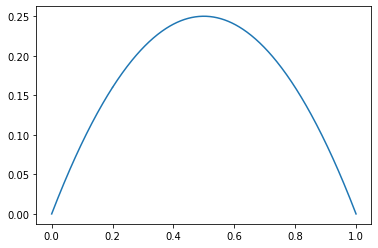

In [7]:
from src.fe_approx1D_numint import *
x = sym.Symbol('x')
f = x*(1 - x)
N_e = 10
vertices, cells, dof_map = mesh_uniform(N_e, d=3, Omega=[0,1])
phi = [basis(len(dof_map[e])-1) for e in range(N_e)]
A, b = assemble(vertices, cells, dof_map, phi, f, False)
c = np.linalg.solve(A, b)
# Make very fine mesh and sample u(x) on this mesh for plotting
x_u, u = u_glob(c, vertices, cells, dof_map,
                resolution_per_element=51)
plt.plot(x_u, u)

These steps are offered in the `approximate` function, which we here
apply to see how well four P0 elements (piecewise constants)
can approximate a parabola:

phi basis (reference element):
 [[1], [1], [1], [1]]
cells: [[0, 1], [1, 2], [2, 3], [3, 4]]
vertices: [0.0, 0.25, 0.5, 0.75, 1.0]
dof_map: [[0], [1], [2], [3]]
A:
 [[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]
b:
 [0.02604167 0.05729167 0.05729167 0.02604167]
c:
 [0.10416667 0.22916667 0.22916667 0.10416667]
Plain interpolation/collocation:
[0.0, 0.1875, 0.25, 0.1875, 0.0]


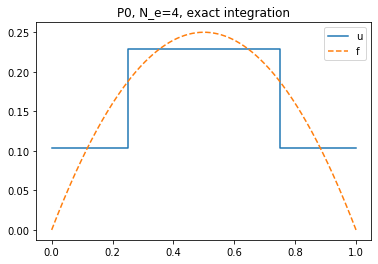

phi basis (reference element):
 [[1], [1], [1], [1], [1], [1], [1], [1]]
cells: [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]]
vertices: [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
dof_map: [[0], [1], [2], [3], [4], [5], [6], [7]]
A:
 [[0.125 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.125 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.125 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.125 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.125 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.125 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.125]]
b:
 [0.00716146 0.01888021 0.02669271 0.03059896 0.03059896 0.02669271
 0.01888021 0.00716146]
c:
 [0.05729167 0.15104167 0.21354167 0.24479167 0.24479167 0.21354167
 0.15104167 0.05729167]
Plain interpolation/collocation:
[0.0, 0.109375, 0.1875, 0.234375, 0.25, 0.234375, 0.1875, 0.109375, 0.0]


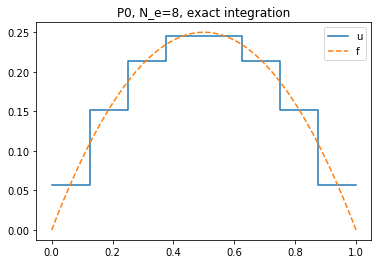

In [8]:
from src.fe_approx1D_numint import *
x=sym.Symbol("x")
for N_e in 4, 8:
    approximate(x*(1-x), d=0, N_e=N_e, Omega=[0,1])

[Figure](#fem:approx:fe:element:impl:fig:P0:x2) shows the result.


<!-- dom:FIGURE: [fig/fe_p0_x2_4e_8e.png, width=600] Approximation of a parabola by 4 (left) and 8 (right) P0 elements. <div id="fem:approx:fe:element:impl:fig:P0:x2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:element:impl:fig:P0:x2"></div>

<p>Approximation of a parabola by 4 (left) and 8 (right) P0 elements.</p>
<img src="fig/fe_p0_x2_4e_8e.png" width=600>

<!-- end figure -->



## Computing the error of the approximation
<div id="fem:approx:fe:error"></div>

So far we have focused on computing the coefficients $c_j$ in the
approximation $u(x)=\sum_jc_j{\varphi}_j$ as well as on plotting $u$ and
$f$ for visual comparison. A more quantitative comparison needs to
investigate the error $e(x)=f(x)-u(x)$. We mostly want a single number to
reflect the error and use a norm for this purpose, usually the $L^2$ norm

$$
||e||_{L^2} = \left(\int_{\Omega} e^2 {\, \mathrm{d}x}\right)^{1/2}{\thinspace .}
$$

Since the finite element approximation is defined for all $x\in\Omega$,
and we are interested in how $u(x)$ deviates from $f(x)$ through all
the elements,
we can either integrate analytically or use an accurate numerical
approximation. The latter is more convenient as it is a generally
feasible and simple approach. The idea is to sample $e(x)$
at a large number of points in each element. The function `u_glob`
in the `fe_approx1D_numint` module does this for $u(x)$ and returns
an array `x` with coordinates and an array `u` with the $u$ values:

In [ ]:
#DO NOT RUN THIS CELL
x, u = u_glob(c, vertices, cells, dof_map,
              resolution_per_element=101)
e = f(x) - u

Let us use the Trapezoidal method to approximate the integral. Because
different elements may have different lengths, the `x` array may have
a non-uniformly distributed set of coordinates. Also, the `u_glob`
function works in an element by element fashion such that coordinates
at the boundaries between elements appear twice. We therefore need
to use a "raw" version of the Trapezoidal rule where we just add up
all the trapezoids:

$$
\int_\Omega g(x) {\, \mathrm{d}x} \approx \sum_{j=0}^{n-1} \frac{1}{2}(g(x_j) +
g(x_{j+1}))(x_{j+1}-x_j),
$$

if $x_0,\ldots,x_n$ are all the coordinates in `x`. In
vectorized Python code,

In [94]:
#DO NOT RUN THIS CELL
g_x = g(x)
integral = 0.5*np.sum((g_x[:-1] + g_x[1:])*(x[1:] - x[:-1]))

Computing the $L^2$ norm of the error, here named `E`, is now achieved by

In [95]:
#DO NOT RUN THIS CELL
e2 = e**2
E = np.sqrt(0.5*np.sum((e2[:-1] + e2[1:])*(x[1:] - x[:-1]))


# Finite elements in 2D and 3D

Finite element approximation is particularly powerful in 2D and 3D because
the method can handle a geometrically complex domain $\Omega$ with ease.
The principal idea is, as in 1D, to divide the domain into cells
and use polynomials for approximating a function over a cell.
Two popular cell shapes are triangles and quadrilaterals.
It is common to denote finite elements on triangles and tetrahedrons as P while
elements defined in terms of quadrilaterals and boxes are denoted by Q.
Figures [fem:approx:fe:2D:fig:rectP1](#fem:approx:fe:2D:fig:rectP1), [fem:approx:fe:2D:fig:circP1](#fem:approx:fe:2D:fig:circP1),
and [fem:approx:fe:2D:fig:rectQ1](#fem:approx:fe:2D:fig:rectQ1) provide examples. P1 elements
means linear functions ($a_0 + a_1x + a_2y$) over triangles, while Q1 elements
have bilinear functions ($a_0 + a_1x + a_2y + a_3xy$) over rectangular cells.
Higher-order elements can easily be defined.


<!-- dom:FIGURE: [fig/mesh2D_rect_P1.png, width=800] Example on 2D P1 elements. <div id="fem:approx:fe:2D:fig:rectP1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:rectP1"></div>

<p>Example on 2D P1 elements.</p>
<img src="fig/mesh2D_rect_P1.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig/mesh2D_quarter_circle.png, width=400] Example on 2D P1 elements in a deformed geometry. <div id="fem:approx:fe:2D:fig:circP1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:circP1"></div>

<p>Example on 2D P1 elements in a deformed geometry.</p>
<img src="fig/mesh2D_quarter_circle.png" width=400>

<!-- end figure -->


<!-- dom:FIGURE: [fig/mesh2D_rect_Q1.png, width=400] Example on 2D Q1 elements. <div id="fem:approx:fe:2D:fig:rectQ1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:rectQ1"></div>

<p>Example on 2D Q1 elements.</p>
<img src="fig/mesh2D_rect_Q1.png" width=400>

<!-- end figure -->



## Basis functions over triangles in the physical domain

Cells with triangular shape will be in main focus here.  With the P1
triangular element, $u$ is a linear function over each cell, as
depicted in [Figure](#fem:approx:fe:2D:fig:femfunc), with
discontinuous derivatives at the cell boundaries.

<!-- dom:FIGURE: [fig/demo2D_4x3r.png, width=400] Example on scalar function defined in terms of piecewise linear 2D functions defined on triangles. <div id="fem:approx:fe:2D:fig:femfunc"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:femfunc"></div>

<p>Example on scalar function defined in terms of piecewise linear 2D functions defined on triangles.</p>
<img src="fig/demo2D_4x3r.png" width=400>

<!-- end figure -->


We give the vertices of the cells global and local numbers as in 1D.
The degrees of freedom in the P1 element are the function values at
a set of nodes, which are the three vertices.
The basis function ${\varphi}_i(x,y)$ is then 1 at the vertex with global vertex
number $i$ and zero at all other vertices.
On an element, the three degrees of freedom uniquely determine
the linear basis functions in that element, as usual.
The global
${\varphi}_i(x,y)$ function is then a combination of the linear functions
(planar surfaces)
over all the neighboring cells
that have vertex number $i$ in common. [Figure](#fem:approx:fe:2D:fig:basphi)
tries to illustrate the shape of such a "pyramid"-like function.

<!-- dom:FIGURE: [fig/demo2D_basisfunc.png, width=400] Example on a piecewise linear 2D basis function over a patch of triangles. <div id="fem:approx:fe:2D:fig:basphi"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:basphi"></div>

<p>Example on a piecewise linear 2D basis function over a patch of triangles.</p>
<img src="fig/demo2D_basisfunc.png" width=400>

<!-- end figure -->


### Element matrices and vectors

As in 1D, we split the integral over $\Omega$ into a sum of integrals
over cells. Also as in 1D, ${\varphi}_i$ overlaps ${\varphi}_j$
(i.e., ${\varphi}_i{\varphi}_j\neq 0$) if and only if
$i$ and $j$ are vertices in the same cell. Therefore, the integral
of ${\varphi}_i{\varphi}_j$ over an element is nonzero only when $i$ and $j$
run over the vertex numbers in the element. These nonzero contributions
to the coefficient matrix are, as in 1D, collected in an element matrix.
The size of the element matrix becomes $3\times 3$ since there are
three degrees of freedom
that $i$ and $j$ run over. Again, as in 1D, we number the
local vertices in a cell, starting at 0, and add the entries in
the element matrix into the global system matrix, exactly as in 1D.
All the details and code appear below.



## Basis functions over triangles in the reference cell

As in 1D, we can define the basis functions and the degrees of freedom
in a reference cell and then use a mapping from the reference coordinate
system to the physical coordinate system.
We also need a mapping of local degrees of freedom numbers to global degrees
of freedom numbers.
<!-- (`dof_map`). -->

The reference cell in an $(X,Y)$ coordinate system has vertices
$(0,0)$, $(1,0)$, and $(0,1)$, corresponding to local vertex numbers
0, 1, and 2, respectively. The P1 element has linear functions
${\tilde{\varphi}}_r(X,Y)$ as basis functions, $r=0,1,2$.
Since a linear function ${\tilde{\varphi}}_r(X,Y)$ in 2D is of
the form $C_{r,0} + C_{r,1}X + C_{r,2}Y$, and hence has three
parameters $C_{r,0}$, $C_{r,1}$, and $C_{r,2}$, we need three
degrees of freedom. These are in general taken as the function values at a
set of nodes. For the P1 element the set of nodes is the three vertices.
[Figure](#fem:approx:fe:2D:fig:P12D) displays the geometry of the
element and the location of the nodes.

<!-- dom:FIGURE: [fig/fenics-book/elements/P1_2d.png, width=100 frac=0.3] 2D P1 element. <div id="fem:approx:fe:2D:fig:P12D"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:P12D"></div>

<p>2D P1 element.</p>
<img src="fig/fenics-book/elements/P1_2d.png" width=100>

<!-- end figure -->


Requiring ${\tilde{\varphi}}_r=1$ at node number $r$ and
${\tilde{\varphi}}_r=0$ at the two other nodes, gives three linear equations to
determine $C_{r,0}$, $C_{r,1}$, and $C_{r,2}$. The result is

<!-- Equation labels as ordinary links -->
<div id="_auto63"></div>

$$
\begin{equation}
{\tilde{\varphi}}_0(X,Y) = 1 - X - Y,
\label{_auto63} \tag{122}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto64"></div>

$$
\begin{equation} 
{\tilde{\varphi}}_1(X,Y) = X,
\label{_auto64} \tag{123}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto65"></div>

$$
\begin{equation} 
{\tilde{\varphi}}_2(X,Y) = Y
\label{_auto65} \tag{124}
\end{equation}
$$

Higher-order approximations are obtained by increasing the polynomial order,
adding additional nodes, and letting the degrees of freedom be
function values at the nodes. [Figure](#fem:approx:fe:2D:fig:P22D)
shows the location of the six nodes in the P2 element.

<!-- dom:FIGURE: [fig/fenics-book/elements/P2_2d.png, width=100 frac=0.3] 2D P2 element. <div id="fem:approx:fe:2D:fig:P22D"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:P22D"></div>

<p>2D P2 element.</p>
<img src="fig/fenics-book/elements/P2_2d.png" width=100>

<!-- end figure -->


<!-- 2DO: write up local basis funcs for P2 -->

A polynomial of degree $p$ in $X$ and $Y$ has $n_p=(p+1)(p+2)/2$ terms
and hence needs $n_p$ nodes. The values at the nodes constitute $n_p$
degrees of freedom. The location of the nodes for
${\tilde{\varphi}}_r$ up to degree 6 is displayed in [Figure](#fem:approx:fe:2D:fig:P162D).

<!-- dom:FIGURE: [fig/fenics-book/elements/P1-6_2d.png, width=400 frac=1.0] 2D P1, P2, P3, P4, P5, and P6 elements. <div id="fem:approx:fe:2D:fig:P162D"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:P162D"></div>

<p>2D P1, P2, P3, P4, P5, and P6 elements.</p>
<img src="fig/fenics-book/elements/P1-6_2d.png" width=400>

<!-- end figure -->


The generalization to 3D is straightforward: the reference element is a
[tetrahedron](http://en.wikipedia.org/wiki/Tetrahedron)
with vertices $(0,0,0)$, $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$
in a $X,Y,Z$ reference coordinate system. The P1 element has its degrees
of freedom as four nodes, which are the four vertices, see [Figure](#fem:approx:fe:2D:fig:P1:123D). The P2 element adds additional
nodes along the edges of the cell, yielding a total of 10 nodes and
degrees of freedom, see
[Figure](#fem:approx:fe:2D:fig:P2:123D).

<!-- dom:FIGURE: [fig/fenics-book/elements/P1-1d2d3d.png, width=400 frac=1.0] P1 elements in 1D, 2D, and 3D. <div id="fem:approx:fe:2D:fig:P1:123D"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:P1:123D"></div>

<p>P1 elements in 1D, 2D, and 3D.</p>
<img src="fig/fenics-book/elements/P1-1d2d3d.png" width=400>

<!-- end figure -->


<!-- dom:FIGURE: [fig/fenics-book/elements/P2-1d2d3d.png, width=400 frac=1.0] P2 elements in 1D, 2D, and 3D. <div id="fem:approx:fe:2D:fig:P2:123D"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:P2:123D"></div>

<p>P2 elements in 1D, 2D, and 3D.</p>
<img src="fig/fenics-book/elements/P2-1d2d3d.png" width=400>

<!-- end figure -->



The interval in 1D, the triangle in 2D, the tetrahedron in 3D, and
its generalizations to higher space dimensions are known
as *simplex* cells (the geometry) or *simplex* elements (the geometry,
basis functions, degrees of freedom, etc.). The plural forms
[simplices](http://en.wikipedia.org/wiki/Simplex) and
simplexes are
also  much used shorter terms when referring to this type of cells or elements.
The side of a simplex is called a *face*, while the tetrahedron also
has *edges*.


**Acknowledgment.**
Figures [fem:approx:fe:2D:fig:P12D](#fem:approx:fe:2D:fig:P12D)-[fem:approx:fe:2D:fig:P2:123D](#fem:approx:fe:2D:fig:P2:123D)
are created by Anders Logg and taken from the [FEniCS book](https://launchpad.net/fenics-book): *Automated Solution of Differential Equations by the Finite Element Method*, edited by A. Logg, K.-A. Mardal, and G. N. Wells, published
by [Springer](http://goo.gl/lbyVMH), 2012.



## Affine mapping of the reference cell

Let ${\tilde{\varphi}}_r^{(1)}$ denote the basis functions associated
with the P1 element in 1D, 2D, or 3D, and let $\boldsymbol{x}_{q(e,r)}$ be
the physical coordinates of local vertex number $r$ in cell $e$.
Furthermore,
let $\boldsymbol{X}$ be a point in the reference coordinate system corresponding
to the point $\boldsymbol{x}$ in the physical coordinate system.
The affine mapping of any $\boldsymbol{X}$ onto $\boldsymbol{x}$ is
then defined by

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:affine:map"></div>

$$
\begin{equation}
\boldsymbol{x} = \sum_{r} {\tilde{\varphi}}_r^{(1)}(\boldsymbol{X})\boldsymbol{x}_{q(e,r)},
\label{fem:approx:fe:affine:map} \tag{125}
\end{equation}
$$

where $r$ runs over the local vertex numbers in the cell.
The affine mapping essentially stretches, translates, and rotates
the triangle. Straight or planar faces of the reference cell are
therefore mapped onto
straight or planar faces in the physical coordinate system. The mapping can
be used for both P1 and higher-order elements, but note that the
mapping itself always applies the P1 basis functions.

<!-- dom:FIGURE: [fig/ElmT3n2D_map.png, width=400] Affine mapping of a P1 element. <div id="fem:approx:fe:map:fig:2DP1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:map:fig:2DP1"></div>

<p>Affine mapping of a P1 element.</p>
<img src="fig/ElmT3n2D_map.png" width=400>

<!-- end figure -->



## Isoparametric mapping of the reference cell


Instead of using the P1 basis functions in the mapping
([125](#fem:approx:fe:affine:map)),
we may use the basis functions of the actual P$d$ element:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:isop:map"></div>

$$
\begin{equation}
\boldsymbol{x} = \sum_{r} {\tilde{\varphi}}_r(\boldsymbol{X})\boldsymbol{x}_{q(e,r)},
\label{fem:approx:fe:isop:map} \tag{126}
\end{equation}
$$

where $r$ runs over all nodes, i.e., all points associated with the
degrees of freedom. This is called an *isoparametric mapping*.
For P1 elements it is identical to the affine mapping
([125](#fem:approx:fe:affine:map)), but for higher-order elements
the mapping of the straight or planar faces of the reference cell will
result in a *curved* face in the physical coordinate system.
For example, when we use the basis functions of the triangular P2 element
in 2D in ([126](#fem:approx:fe:isop:map)), the straight faces of the
reference triangle are mapped onto curved faces of parabolic shape in
the physical coordinate system, see [Figure](#fem:approx:fe:map:fig:2DP2).

<!-- dom:FIGURE: [fig/ElmT6n2D_map.png, width=400] Isoparametric mapping of a P2 element. <div id="fem:approx:fe:map:fig:2DP2"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:map:fig:2DP2"></div>

<p>Isoparametric mapping of a P2 element.</p>
<img src="fig/ElmT6n2D_map.png" width=400>

<!-- end figure -->


From ([125](#fem:approx:fe:affine:map)) or
([126](#fem:approx:fe:isop:map)) it is easy to realize that the
vertices are correctly mapped. Consider a vertex with local number $s$.
Then ${\tilde{\varphi}}_s=1$ at this vertex and zero at the others.
This means that only one term in the sum is nonzero and $\boldsymbol{x}=\boldsymbol{x}_{q(e,s)}$,
which is the coordinate of this vertex in the global coordinate system.


## Computing integrals

Let $\tilde\Omega^r$ denote the reference cell and $\Omega^{(e)}$
the cell in the physical coordinate system. The transformation of
the integral from the physical to the reference coordinate system reads

<!-- Equation labels as ordinary links -->
<div id="_auto66"></div>

$$
\begin{equation}
\int_{\Omega^{(e)}}{\varphi}_i (\boldsymbol{x}) {\varphi}_j (\boldsymbol{x}) {\, \mathrm{d}x} =
\int_{\tilde\Omega^r} {\tilde{\varphi}}_i (\boldsymbol{X}) {\tilde{\varphi}}_j (\boldsymbol{X})
\det J\, {\, \mathrm{d}X},
\label{_auto66} \tag{127}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto67"></div>

$$
\begin{equation} 
\int_{\Omega^{(e)}}{\varphi}_i (\boldsymbol{x}) f(\boldsymbol{x}) {\, \mathrm{d}x} =
\int_{\tilde\Omega^r} {\tilde{\varphi}}_i (\boldsymbol{X}) f(\boldsymbol{x}(\boldsymbol{X})) \det J\, {\, \mathrm{d}X},
\label{_auto67} \tag{128}
\end{equation}
$$

where ${\, \mathrm{d}x}$ means the infinitesimal area element $dx dy$ in 2D and
$dx dy dz$ in 3D, with a similar
definition of ${\, \mathrm{d}X}$. The quantity $\det J$ is the determinant of the
Jacobian of the mapping $\boldsymbol{x}(\boldsymbol{X})$. In 2D,

<!-- Equation labels as ordinary links -->
<div id="fem:approx:fe:2D:mapping:J:detJ"></div>

$$
\begin{equation}
J = \left[\begin{array}{cc}
\frac{\partial x}{\partial X} & \frac{\partial x}{\partial Y}\\
\frac{\partial y}{\partial X} & \frac{\partial y}{\partial Y}
\end{array}\right], \quad
\det J = \frac{\partial x}{\partial X}\frac{\partial y}{\partial Y}
- \frac{\partial x}{\partial Y}\frac{\partial y}{\partial X}
{\thinspace .}
\label{fem:approx:fe:2D:mapping:J:detJ} \tag{129}
\end{equation}
$$

With the affine mapping
([125](#fem:approx:fe:affine:map)), $\det J=2\Delta$, where $\Delta$ is
the area or volume of the cell in the physical coordinate system.

**Remark.**
Observe that finite elements in 2D and 3D build on the same
*ideas* and *concepts* as in 1D, but there is simply much
more to compute because the
specific mathematical formulas in 2D and 3D are more complicated
and the book-keeping with dof maps also gets more complicated.
The manual work is tedious, lengthy, and error-prone
so automation by the computer is a must.


<!-- 2DO -->
<!-- First: two triangles -->
<!-- vertices = [(0,0), (1,0), (0,1), (1,1)] -->
<!-- cells = [[0, 1, 3], [0, 3, 2]] -->
<!-- dof_map = cells -->
<!-- write up affine mapping -->
<!-- D is the area that sympy.Triangle can compute :-) No, do that directly! 0.5... -->
<!-- rhs: choose simple f=x*y, try hand-calculation or two-step -->
<!-- sympy: first integrate in y with (0,1-x) as limits, then -->
<!-- integrate the result in x -->
<!-- a = integrate(x*y*(1-x-y), (y, 0, 1-x)) -->
<!-- b = integrate(a, (x,0,1)) -->
<!-- use the same for local element matrix -->
<!-- show assembly -->
<!-- should have pysketcher prog for drawing 2D mesh, mark and number nodes -->
<!-- and elements -->

<!-- Should have example with x**8*(1-x)*y**8*(1-y) worked out, but -->
<!-- need software -->

<!-- Need 2D exercises -->

# Implementation
<div id="fe:approx:fenics"></div>


Our previous programs for doing 1D approximation by finite element
basis function had a focus on all the small details needed to compute
the solution. When going to 2D and 3D, the basic algorithms are the
same, but the amount of computational detail with basis functions,
reference functions, mappings, numerical integration and so on,
becomes overwhelming because of all the flexibility and choices of
elements. For this purpose, we *must*, except in the simplest cases
with P1 elements, use some well-developed, existing computer
library.
## Example of approximation in 2D using FEniCS
<div id="fem:approx:fenics:2D"></div>

Here we shall use [FEniCS](http://fenicsproject.org), which
is a free, open source finite element package for advanced computations. The
package can be programmed in C++ or Python. How it works is best
illustrated by an example.

### Mathematical problem

We want to approximate the function $f(x)=2xy - x^2$ by P1 and P2 elements
on $[0,2]\times[-1,1]$ using a division into $8\times 8$ squares, which are
then divided into rectangles and then into triangles.

### The code

Observe that the code employs the basic concepts from 1D, but is
capable of using *any* element in FEniCS on *any* mesh in *any* number of
space dimensions (!).

In [96]:
from fenics import *

def approx(f, V):
     """Return Galerkin approximation to f in V."""
     u = TrialFunction(V)
     v = TestFunction(V)
     a = u*v*dx
     L = f*v*dx
     u = Function(V)
     solve(a == L, u)
     return u

def problem():
    f = Expression('2*x[0]*x[1] - pow(x[0], 2)', degree=2)
    mesh = RectangleMesh(Point(0,-1), Point(2,1), 8, 8)

    V1 = FunctionSpace(mesh, 'P', 1)
    u1 = approx(f, V1)
    u1.rename('u1', 'u1')
    u1_error = errornorm(f, u1, 'L2')
    u1_norm = norm(u1, 'L2')

    V2 = FunctionSpace(mesh, 'P', 2)
    u2 = approx(f, V2)
    u2.rename('u2', 'u2')
    u2_error = errornorm(f, u2, 'L2')
    u2_norm = norm(u2, 'L2')

    print(('L2 errors: e1=%g, e2=%g' % (u1_error, u2_error)))
    print(('L2 norms:  n1=%g, n2=%g' % (u1_norm, u2_norm)))
    # Simple plotting
    import matplotlib.pyplot as plt
    plot(f, title='f', mesh=mesh)
    plt.show()
    plot(u1, title='u1')
    plt.show()
    plot(u2, title='u2')
    plt.show()

if __name__ == '__main__':
    problem()

[Figure](#fem:approx:fenics:2D:fig1) shows the computed `u1`. The plots of
`u2` and `f` are identical and therefore not shown.
The plot shows that visually the approximation is quite close to
`f`, but to quantify it more precisely we simply compute the
error using the function `errornorm`. The output
of errors becomes

        L2 errors: e1=0.01314,   e2=4.93418e-15
        L2 norms:  n1=4.46217,   n2=4.46219


Hence, the second order approximation `u2` is able to reproduce
`f` up to floating point precision, whereas the first
order approximation `u1` has an error of slightly more than $\frac{1}{3}$\%.

<!-- Remember to rotate PDF file from internal FEniCS plotting: -->
<!-- pdftk dolfin_plot_1.pdf cat 1-endnorth output rotated_file.pdf -->

<!-- dom:FIGURE: [fig/fenics_2D_plot_approx.png, width=400 frac=0.7] Plot of the computed approximation using Lagrange elements of second order. <div id="fem:approx:fenics:2D:fig1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fenics:2D:fig1"></div>

<p>Plot of the computed approximation using Lagrange elements of second order.</p>
<img src="fig/fenics_2D_plot_approx.png" width=400>

<!-- end figure -->




### Dissection of the code

The function `approx` is a general solver function for any $f$ and
$V$.  We define the unknown $u$ in the variational form $a=a(u,v) = \int uv{\, \mathrm{d}x}$
as a `TrialFunction` object and the test function $v$ as a
`TestFunction` object. Then we define the variational form through
the integrand `u*v*dx`. The linear form $L$ is similarly defined as
`f*v*dx`. Here, `f` is an `Expression` object in FEniCS, i.e., a
formula defined in terms of a C++ expression. This expression is in turn
jit-compiled into a Python object for fast evaluation. With `a` and `L` defined,
we re-define `u` to be a finite element function `Function`, which is
now the unknown scalar field to be computed by the simple expression
`solve(a == L, u)`. We remark that the above function `approx`
is implemented in FEniCS (in a slightly more general fashion)
in the function  `project`.

The `problem` function applies `approx` to solve a specific problem.

### Integrating SymPy and FEniCS

The definition of $f$ must be expressed in C++.  This part requires
two definitions: one of $f$ and one of $\Omega$, or more precisely:
the mesh (discrete $\Omega$ divided into cells).  The definition of
$f$ is here expressed in C++ (it will be compiled for fast
evaluation), where the independent coordinates are given by a C/C++
vector `x`. This means that $x$ is `x[0]`, $y$ is `x[1]`, and $z$ is
`x[2]`. Moreover, `x[0]**2` must be written as `pow(x[0], 2)` in
C/C++.

Fortunately, we can easily integrate SymPy and `Expression` objects,
because SymPy can take a formula and translate it to C/C++ code, and
then we can require a Python code to numerically evaluate the formula.
Here is how we can specify `f` in SymPy and use it in FEniCS as an
`Expression` object:

In [10]:
import sympy as sym
x, y = sym.symbols('x[0] x[1]')
f = 2*x*y - x**2
print(f)

-x[0]**2 + 2*x[0]*x[1]


In [11]:
f = sym.printing.ccode(f)   # Translate to C code
print(f)

-pow(x[0], 2) + 2*x[0]*x[1]


Here, the function `ccode` generates C code and we use
`x` and `y` as placeholders for
`x[0]` and `x[1]`, which represent the coordinate of
a general point `x` in any dimension. The output of  `ccode`
can then be used directly in  `Expression`.


## Refined code with curve plotting
<div id="fem:approx:fenics:2D:2"></div>

### Interpolation and projection

The operation of defining `a`, `L`, and solving for a `u` is so
common that it has been implemented in the FEniCS function `project`:

In [99]:
u = project(f, V)

So, there is no need for our `approx` function!

If we want to do interpolation (or collocation) instead, we simply do

In [100]:
u = interpolate(f, V)

### Plotting the solution along a line

Having `u` and `f` available as finite element functions (`Function`
objects), we can easily plot the solution along a line since FEniCS
has functionality for evaluating a `Function` at arbitrary points
*inside the domain*. For example, here is the code for plotting $u$ and
$f$ along a line $x=\hbox{const}$ or $y=\hbox{const}$.

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def comparison_plot2D(
    u, f,           # Function expressions in x and y
    value=0.5,      # x or y equals this value
    variation='y',  # independent variable
    n=100,          # no of intervals in plot
    tol=1E-8,       # tolerance for points inside the domain
    plottitle='',   # heading in plot
    filename='tmp', # stem of filename
    ):
    """
    Plot u and f along a line in x or y dir with n intervals
    and a tolerance of tol for points inside the domain.
    """
    v = np.linspace(-1+tol, 1-tol, n+1)
    # Compute points along specified line:
    points = np.array([(value, v_)
                       if variation == 'y' else (v_, value)
                       for v_ in v])
    u_values = [u(point) for point in points] # eval. Function
    f_values = [f(point) for point in points]
    plt.figure()
    plt.plot(v, u_values, 'r-', v, f_values, 'b--')
    plt.legend(['u', 'f'], loc='upper left')
    if variation == 'y':
        plt.xlabel('y'); plt.ylabel('u, f')
    else:
        plt.xlabel('x'); plt.ylabel('u, f')
    plt.title(plottitle)
    plt.savefig(filename + '.pdf')
    plt.savefig(filename + '.png')

### Integrating plotting and computations

It is now very easy to give some graphical impression of the approximations
for various kinds of 2D elements.
Basically, to solve the problem of approximating $f=2xy-x^2$ on $\Omega = [-1,1]\times [0,2]$ by P2 elements on a $2\times 2$ mesh,
we want to integrate the function above with following type of computations:

In [102]:
import fenics as fe
f = fe.Expression('2*x[0]*x[1] - pow(x[0], 2)', degree=2)
mesh = fe.RectangleMesh(fe.Point(1,-1), fe.Point(2,1), 2, 2)
V = fe.FunctionSpace(mesh, 'P', 2)
u = fe.project(f, V)
err = fe.errornorm(f, u, 'L2')
print(err)

However, we can now easily compare different type of elements and
mesh resolutions:

In [103]:
import fenics as fe
import sympy as sym
x, y = sym.symbols('x[0] x[1]')

def problem(f, nx=8, ny=8, degrees=[1,2]):
    """
    Plot u along x=const or y=const for Lagrange elements,
    of given degrees, on a nx times ny mesh. f is a SymPy expression.
    """
    f = sym.printing.ccode(f)
    f = fe.Expression(f, degree=2)
    mesh = fe.RectangleMesh(
        fe.Point(-1, 0), fe.Point(1, 2), 2, 2)
    for degree in degrees:
        if degree == 0:
            # The P0 element is specified like this in FEniCS
            V = fe.FunctionSpace(mesh, 'DG', 0)
        else:
            # The Lagrange Pd family of elements, d=1,2,3,...
            V = fe.FunctionSpace(mesh, 'P', degree)
        u = fe.project(f, V)
        u_error = fe.errornorm(f, u, 'L2')
        print(('||u-f||=%g' % u_error, degree))
        comparison_plot2D(
            u, f,
            n=50,
            value=0.4, variation='x',
            plottitle='Approximation by P%d elements' % degree,
            filename='approx_fenics_by_P%d' % degree,
            tol=1E-3)
        #fe.plot(u, title='Approx by P%d' % degree)

if __name__ == '__main__':
    # x and y are global SymPy variables
    f = 2*x*y - x**16
    f = 2*x*y - x**2
    problem(f, nx=2, ny=2, degrees=[0, 1, 2])
    plt.show()

(We note that this code issues a lot of warnings from the `u(point)`
evaluations.)

We show in [Figure](#fem:approx:fenics:2D:2:fig1)
how $f$ is approximated by P0, P1, and P2 elements
on a very coarse $2\times 2$ mesh consisting of 8 cells.

We have also added the result obtained by P2 elements.

<!-- dom:FIGURE: [fig/approx_fenics_f1.png, width=800 frac=1] Comparison of P0, P1, and P2 approximations (left to right) along a line in a 2D mesh. <div id="fem:approx:fenics:2D:2:fig1"></div> -->
<!-- begin figure -->
<div id="fem:approx:fenics:2D:2:fig1"></div>

<p>Comparison of P0, P1, and P2 approximations (left to right) along a line in a 2D mesh.</p>
<img src="fig/approx_fenics_f1.png" width=800>

<!-- end figure -->